<a href="https://colab.research.google.com/github/uniofuniverse/uniofuniverse/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
house = pd.read_csv('/content/train.csv')
house_test=pd.read_csv('/content/test.csv')

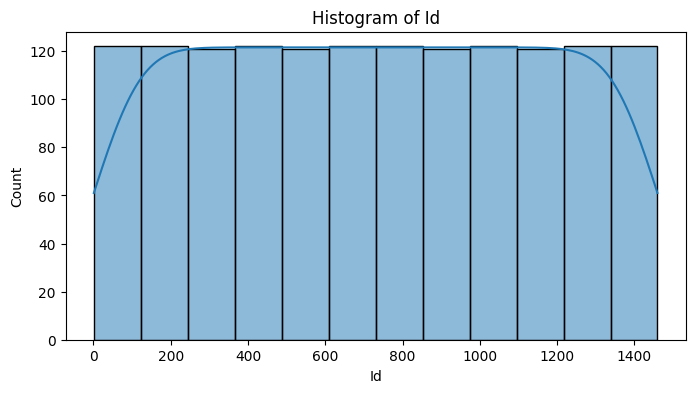

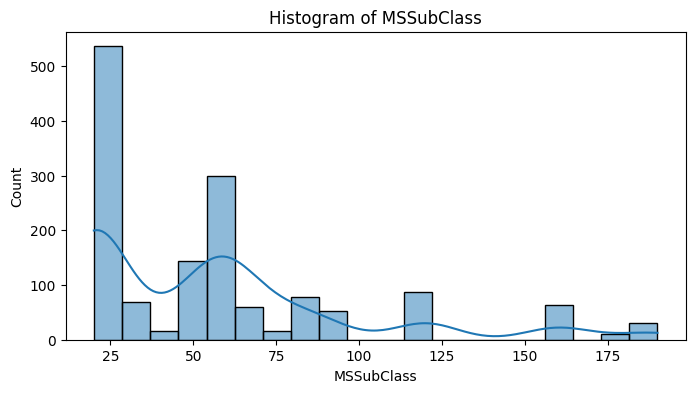

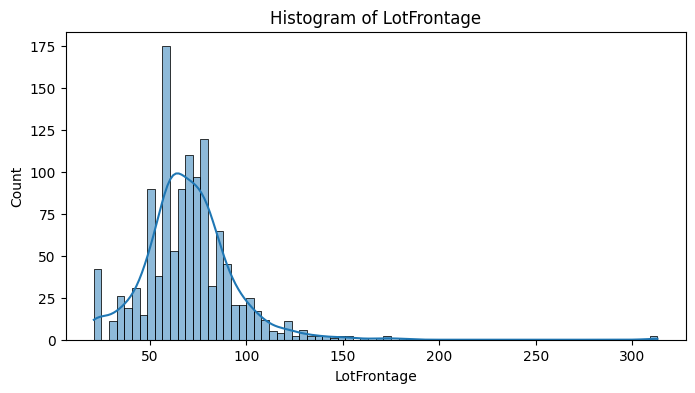

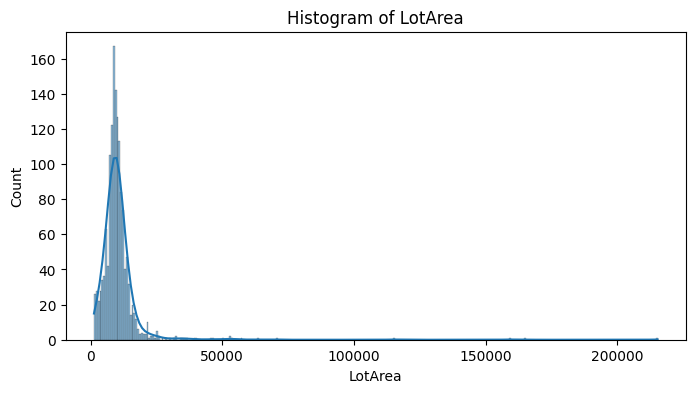

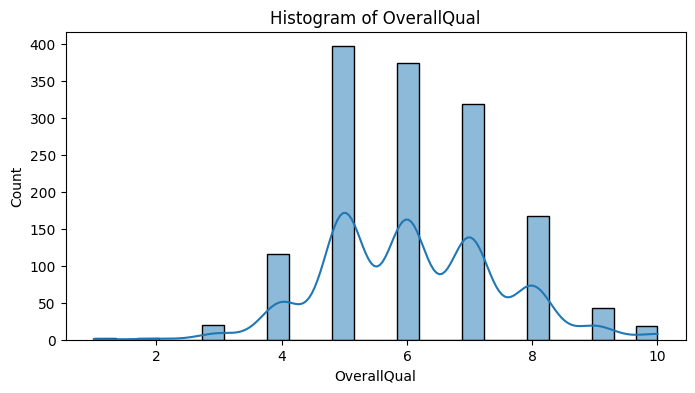

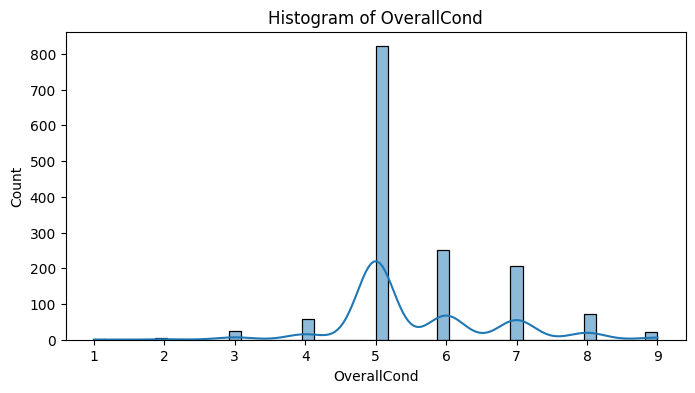

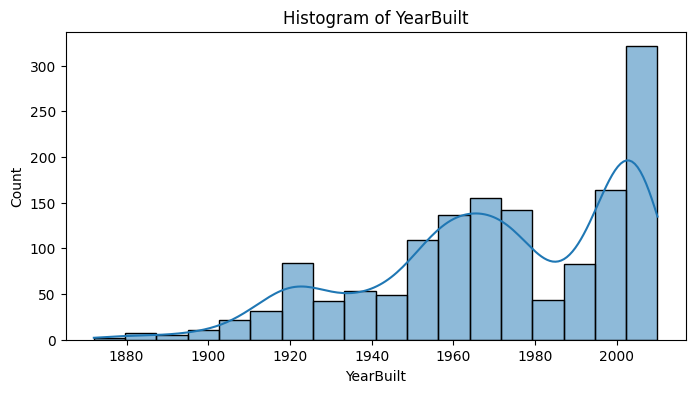

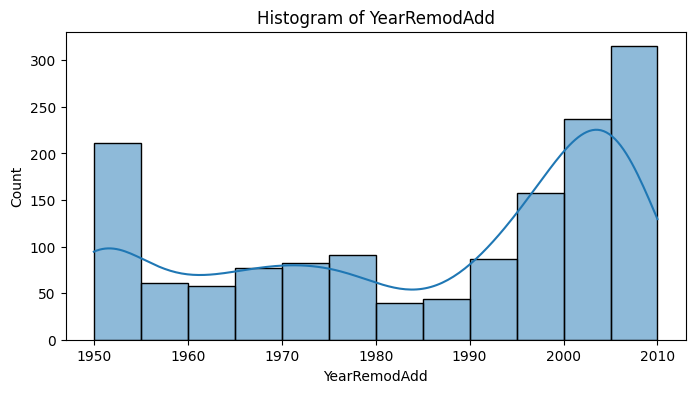

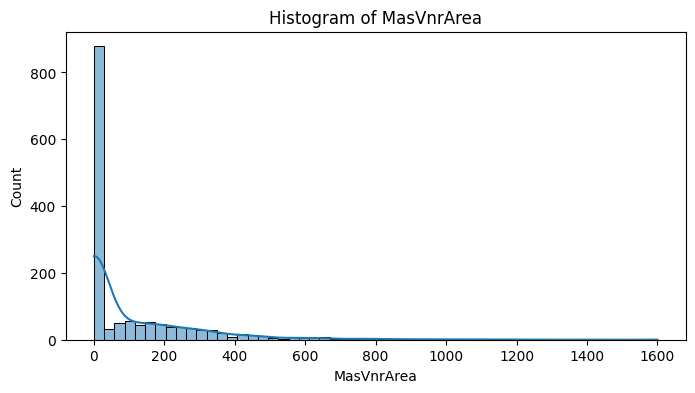

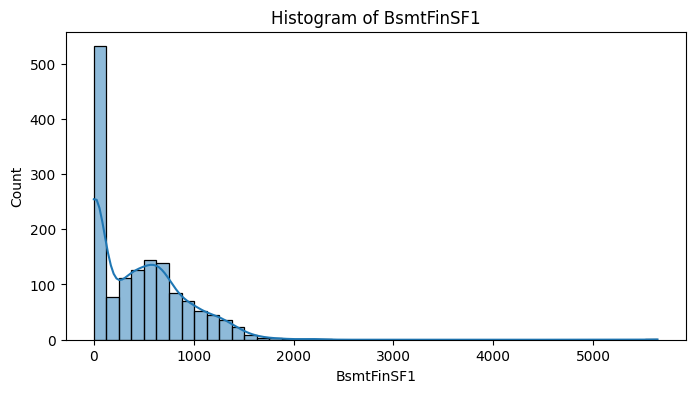

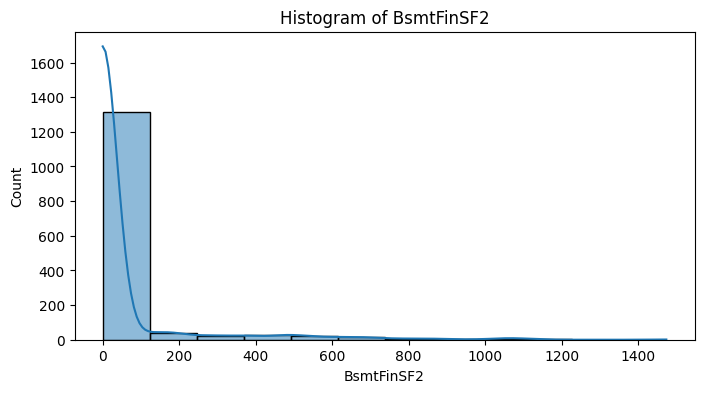

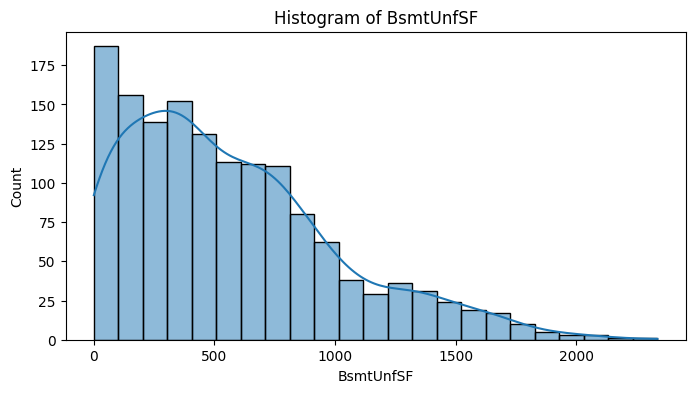

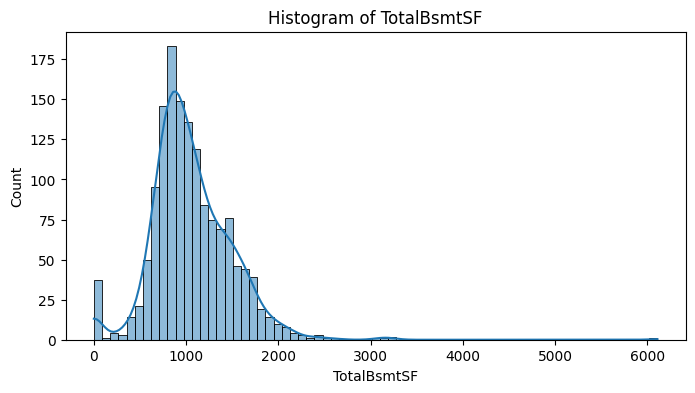

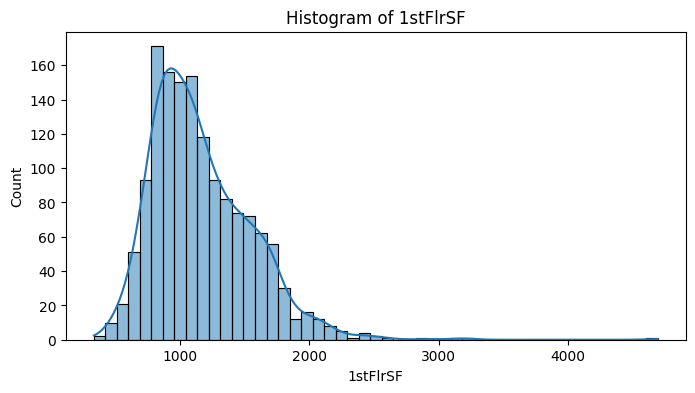

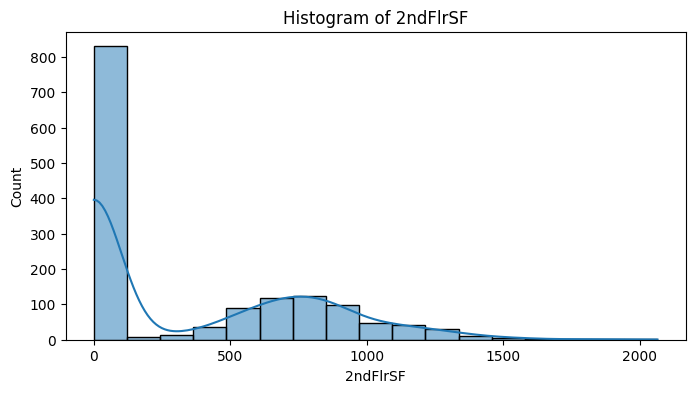

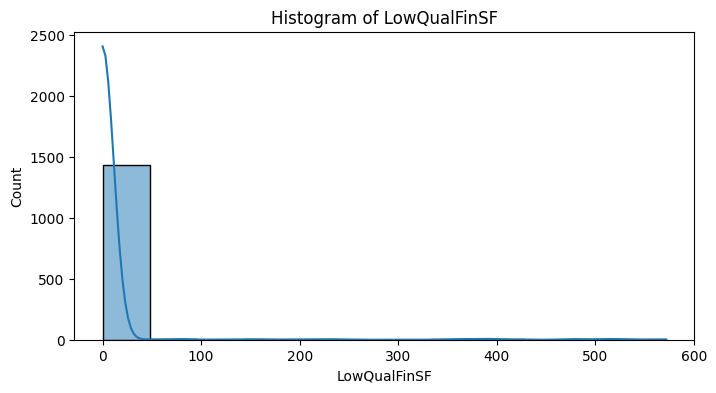

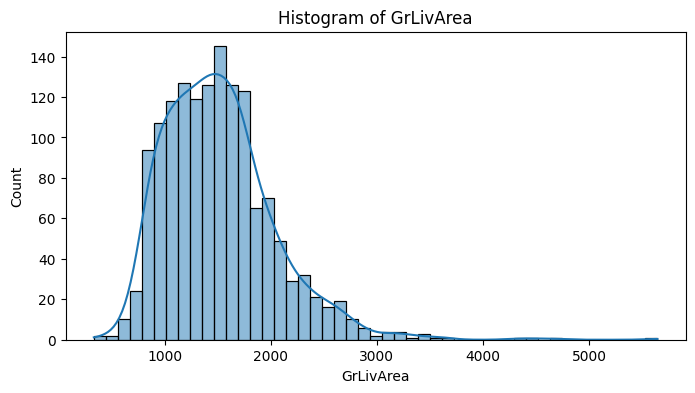

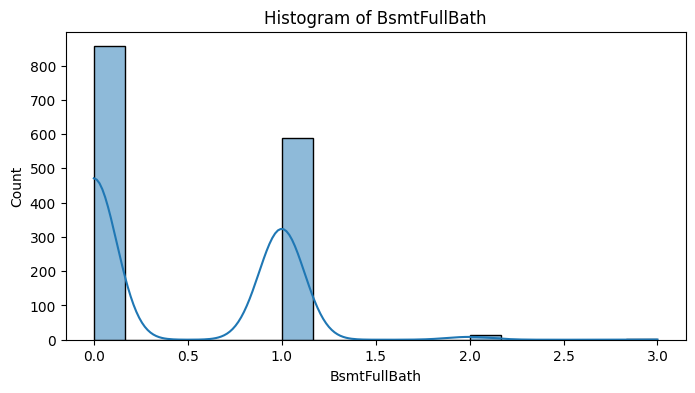

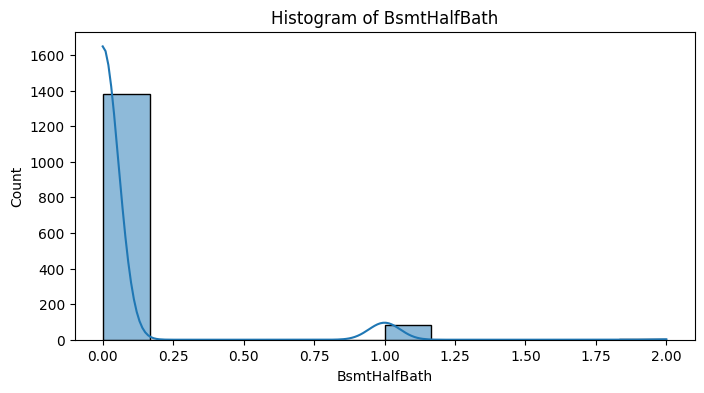

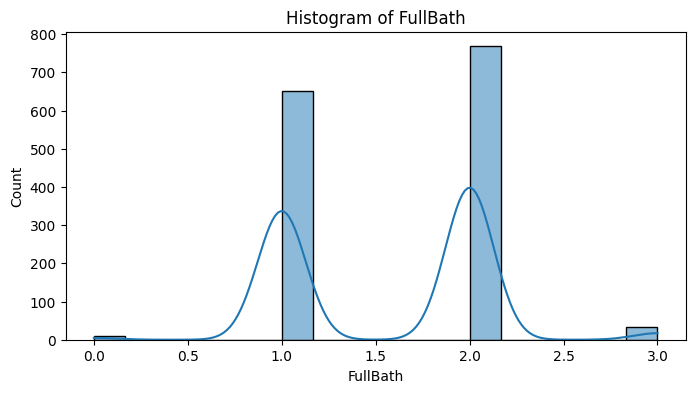

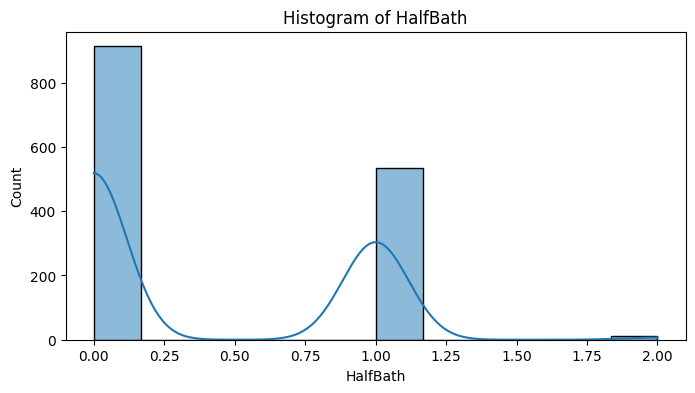

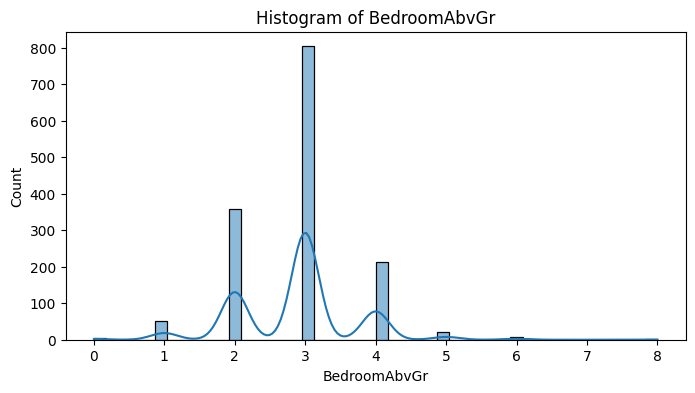

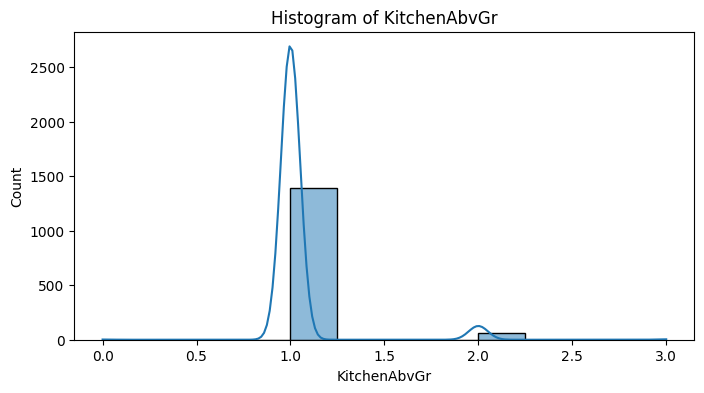

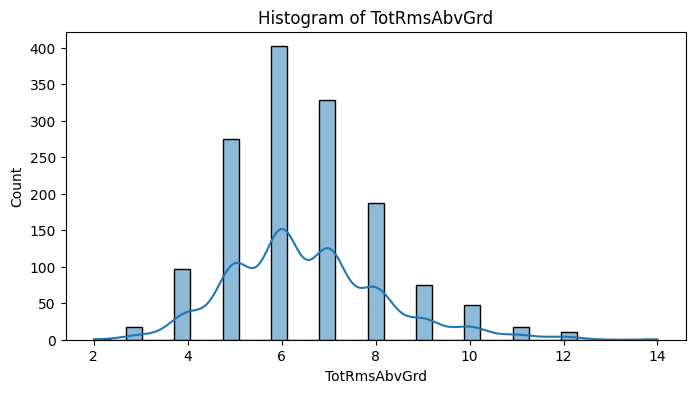

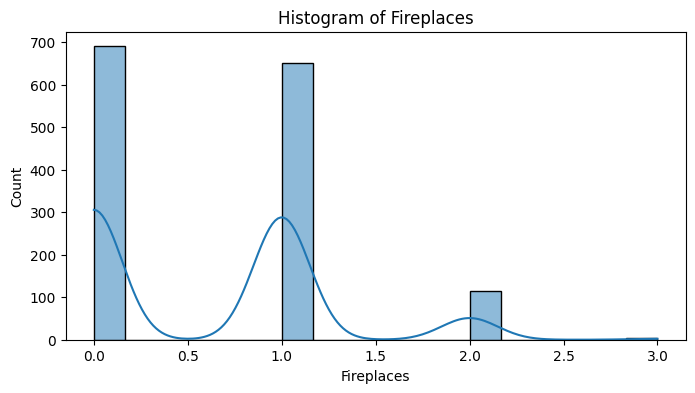

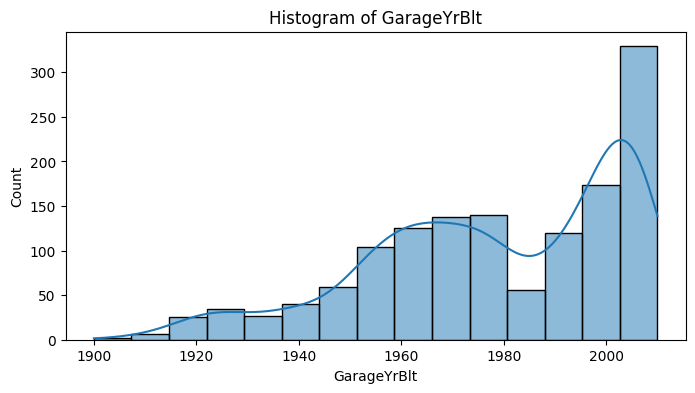

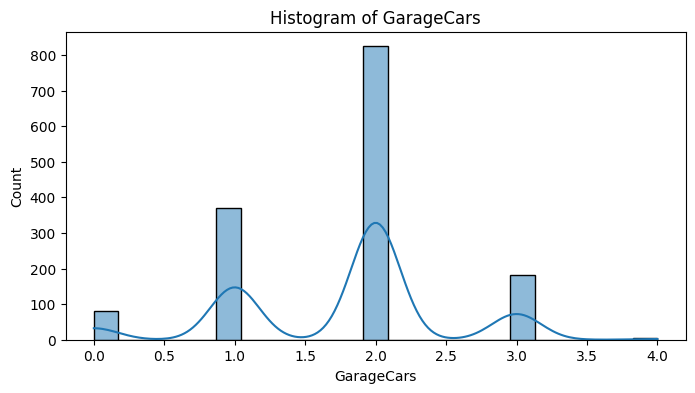

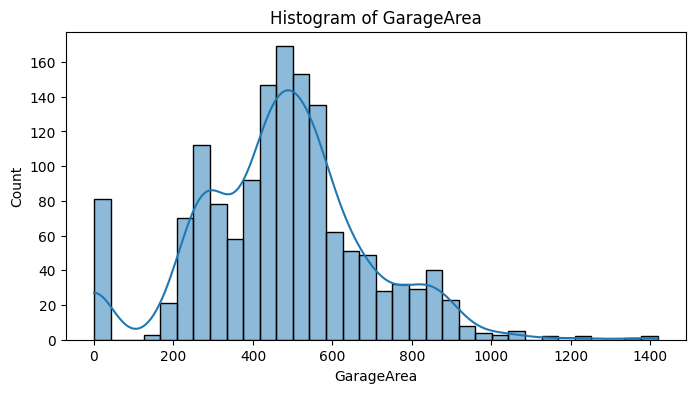

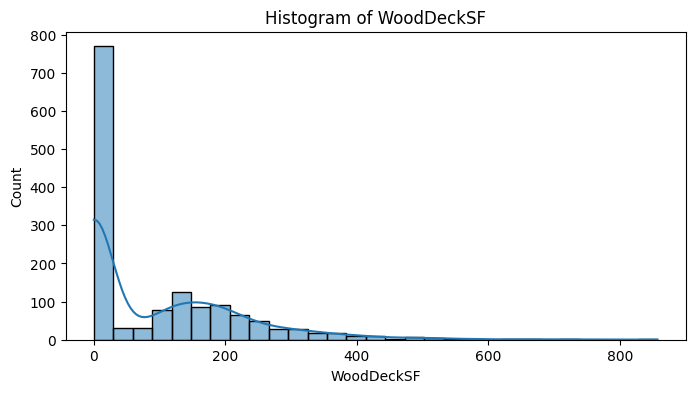

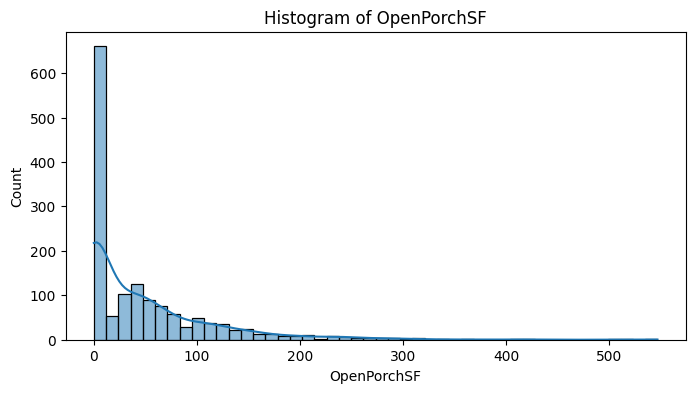

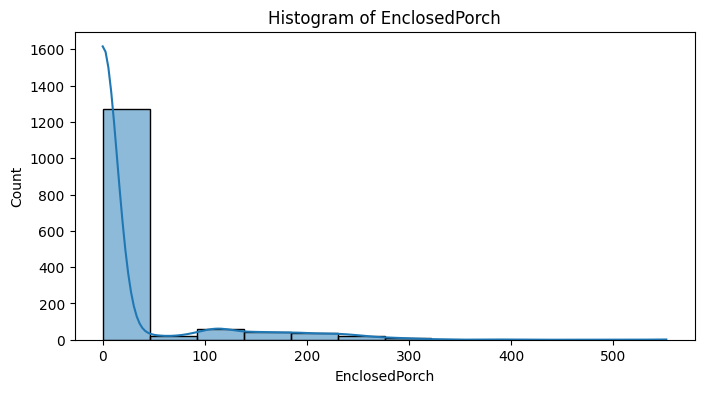

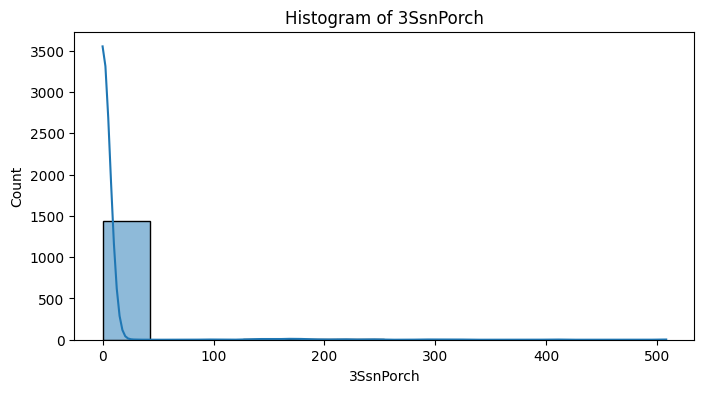

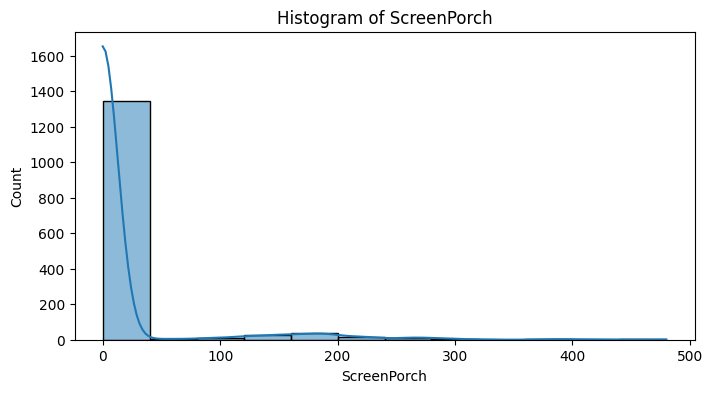

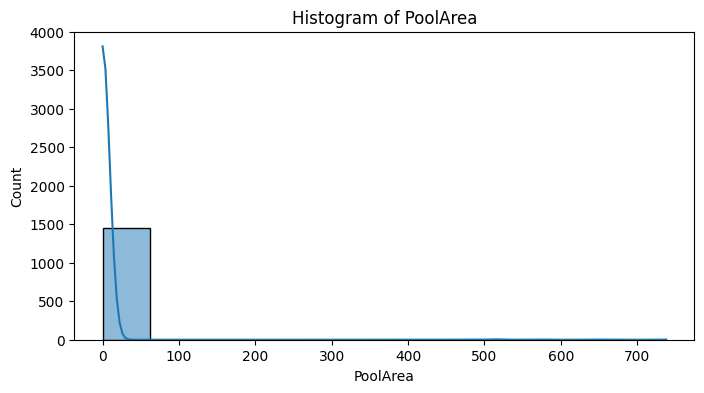

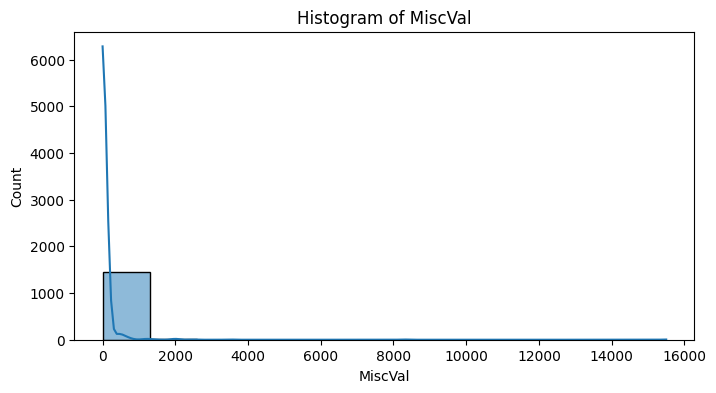

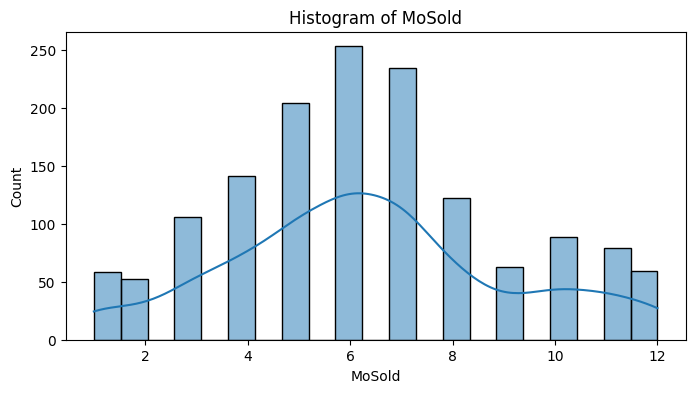

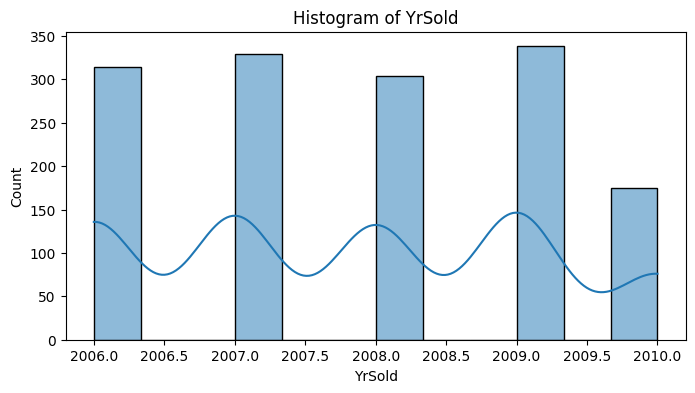

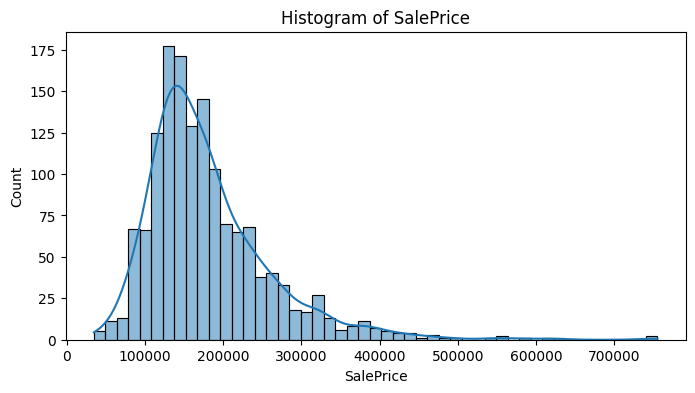

In [ ]:
# Histograms
numeric_cols = house.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=house, x=col, kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()



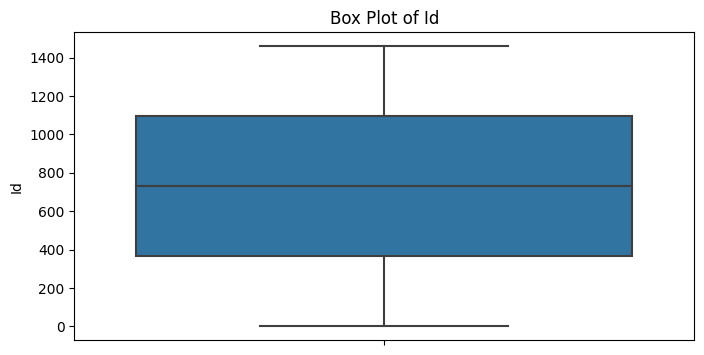

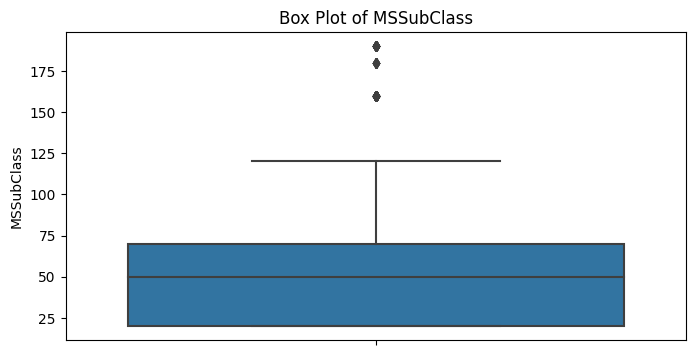

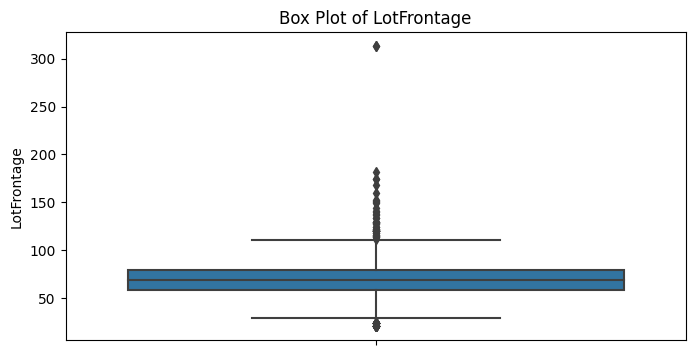

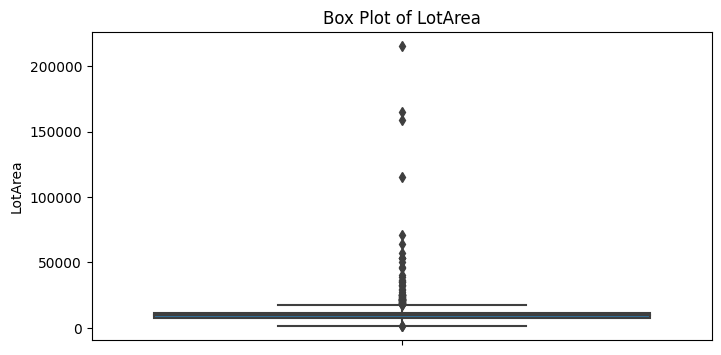

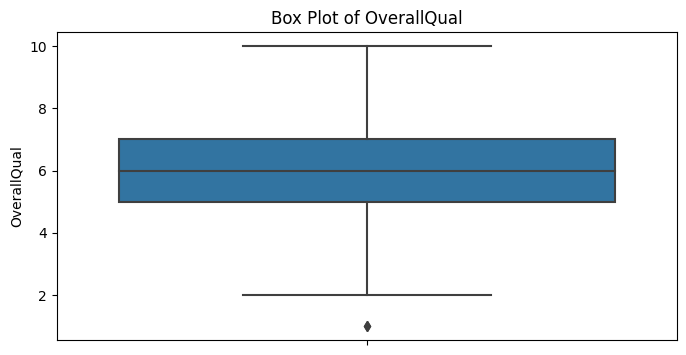

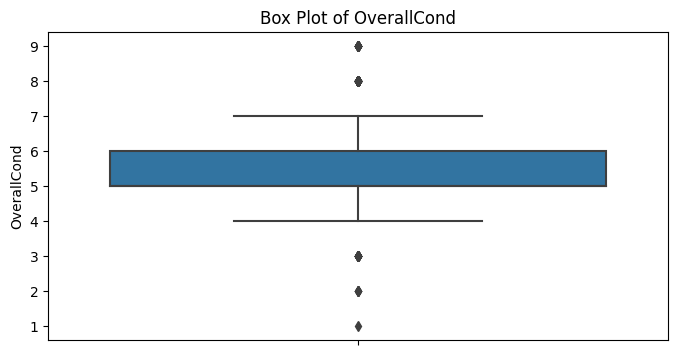

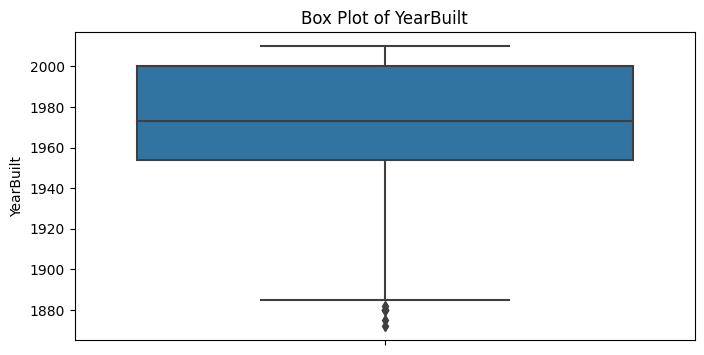

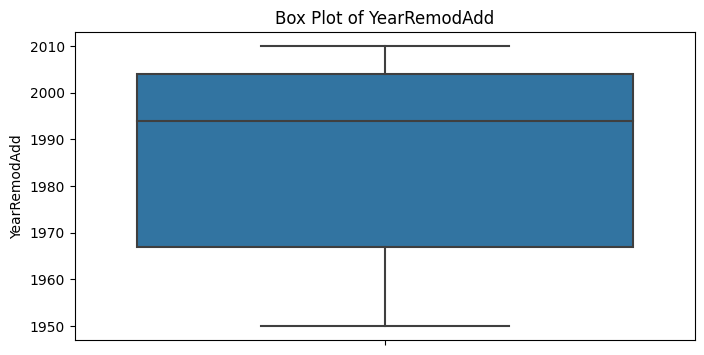

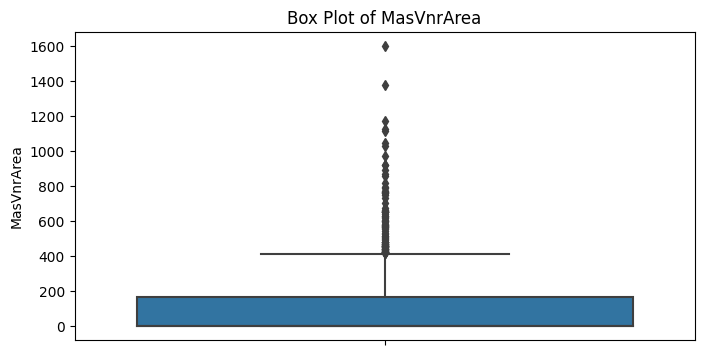

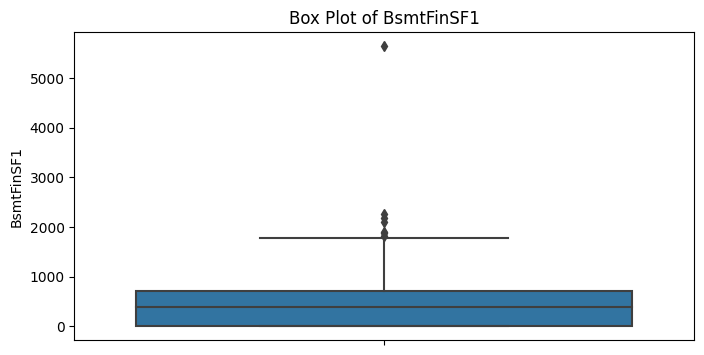

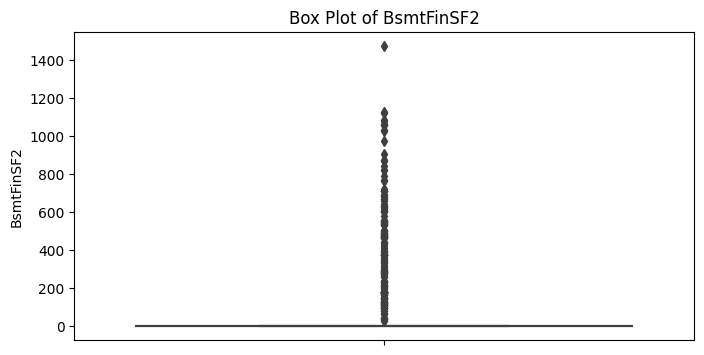

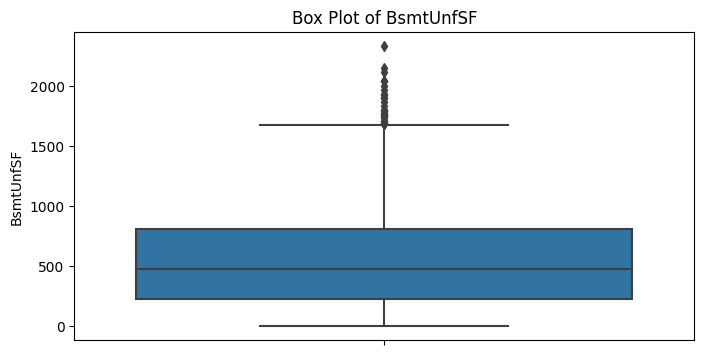

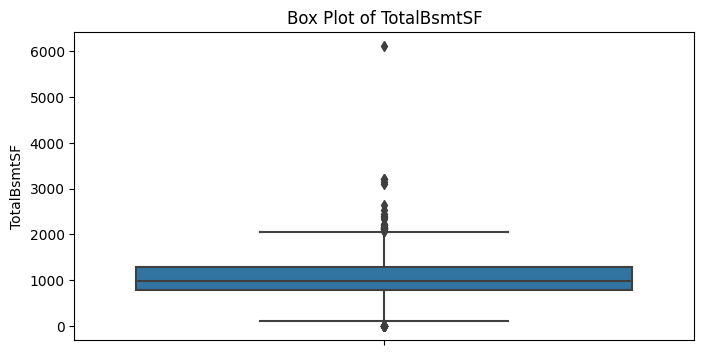

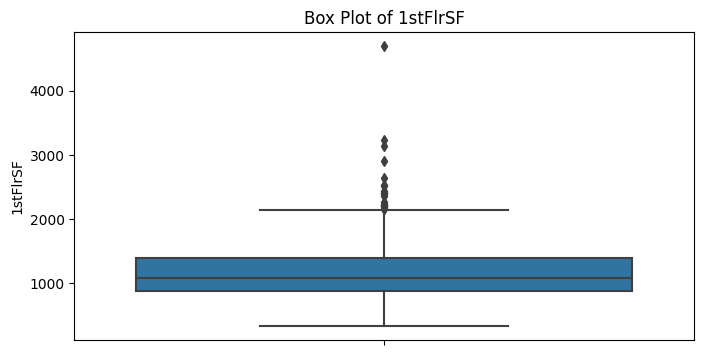

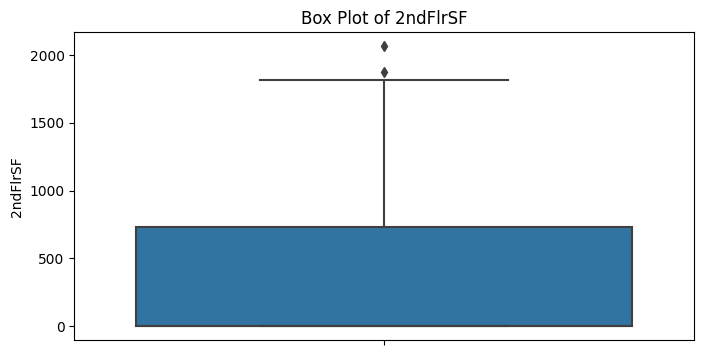

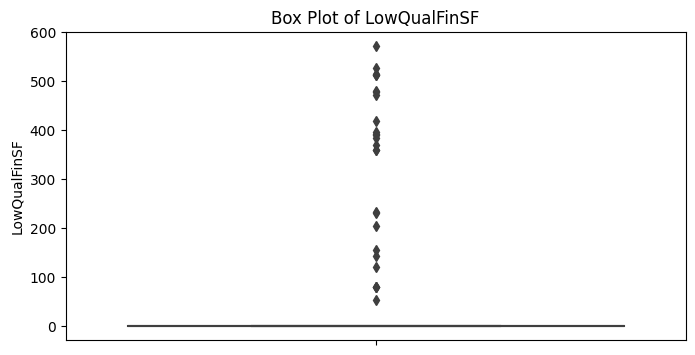

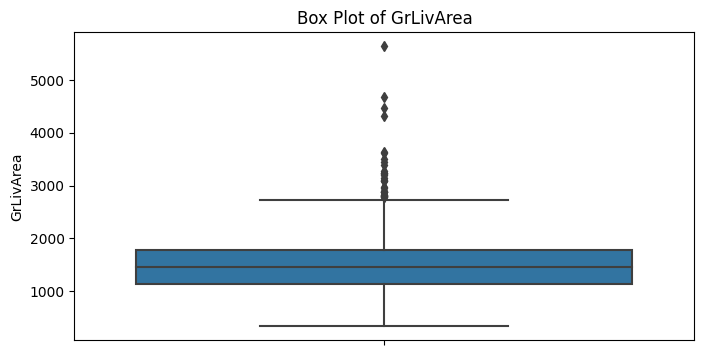

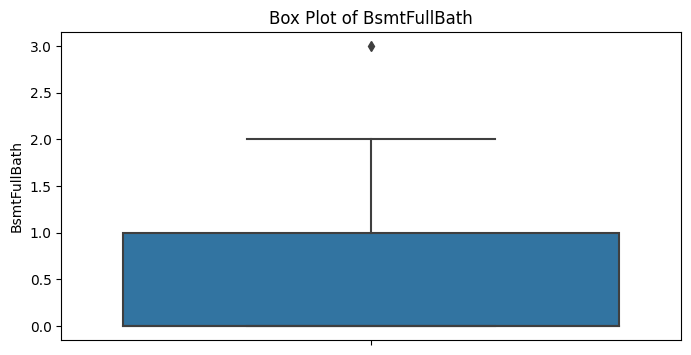

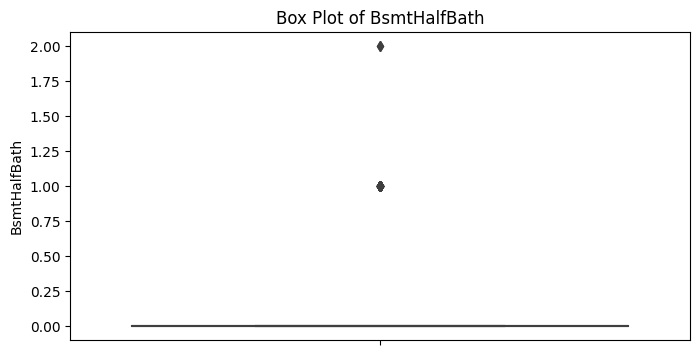

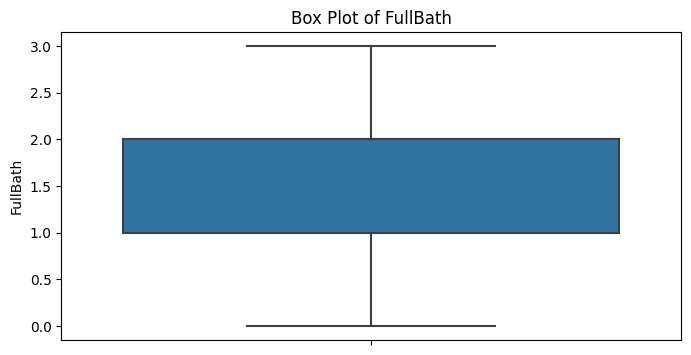

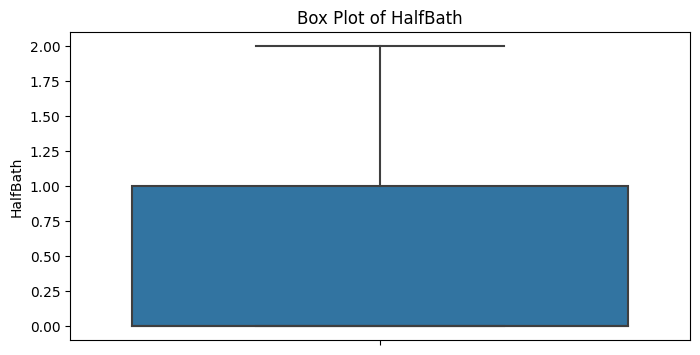

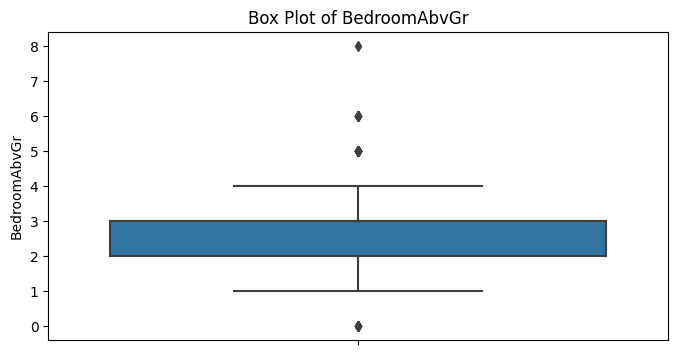

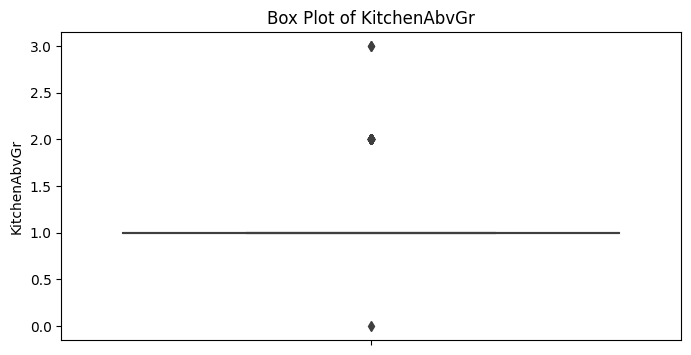

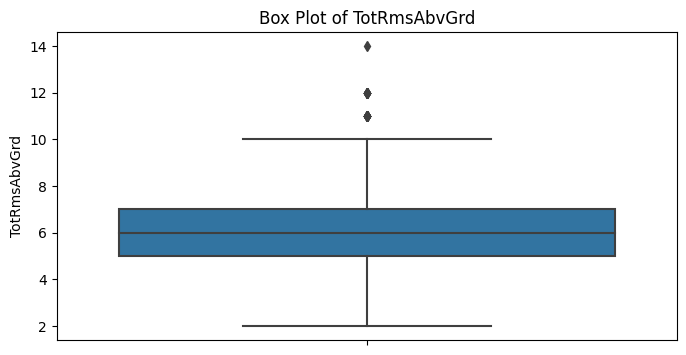

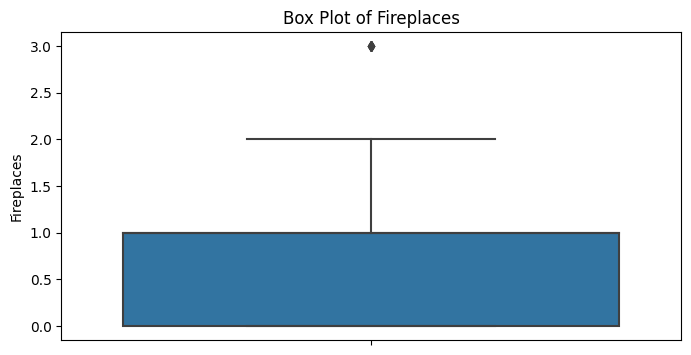

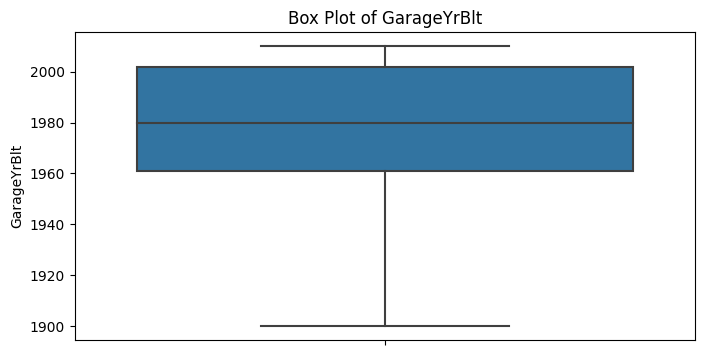

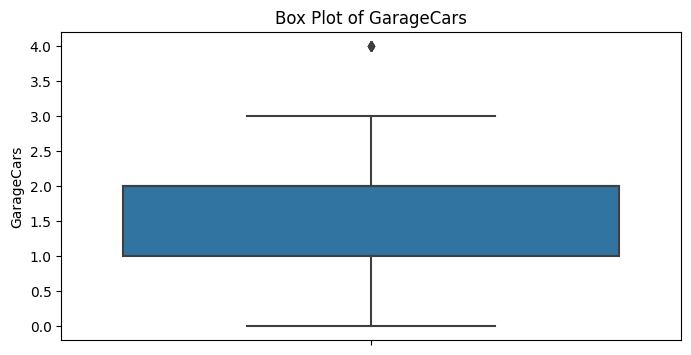

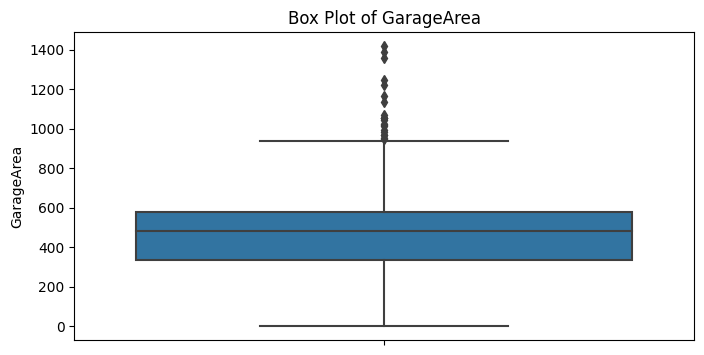

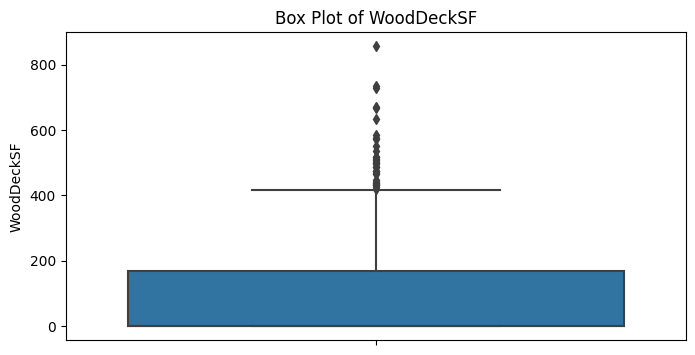

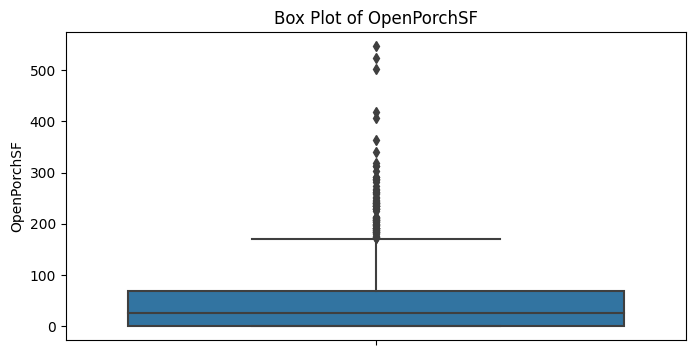

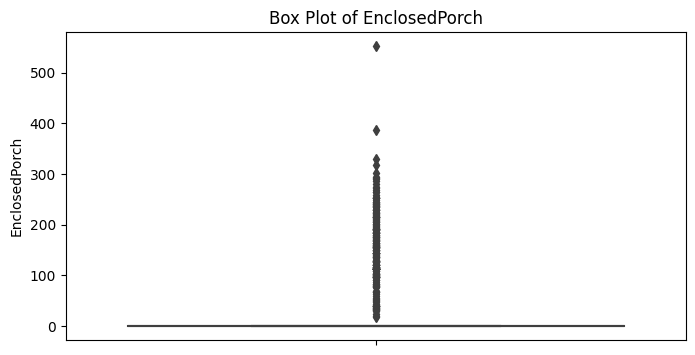

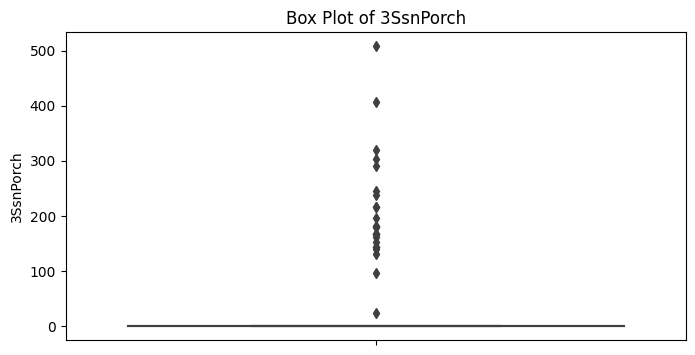

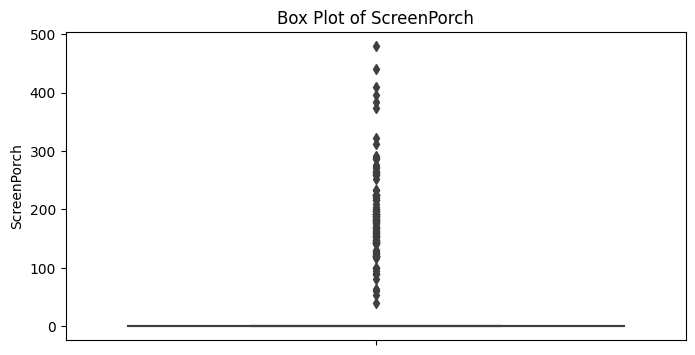

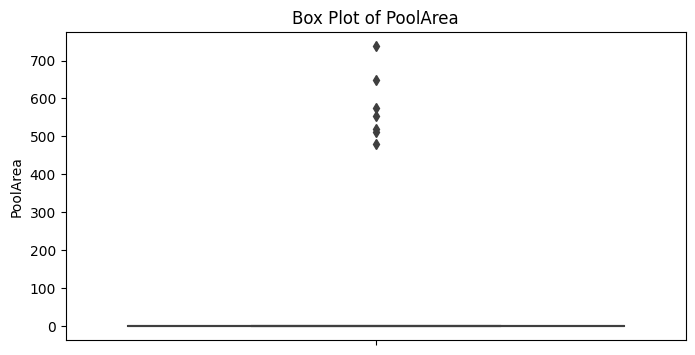

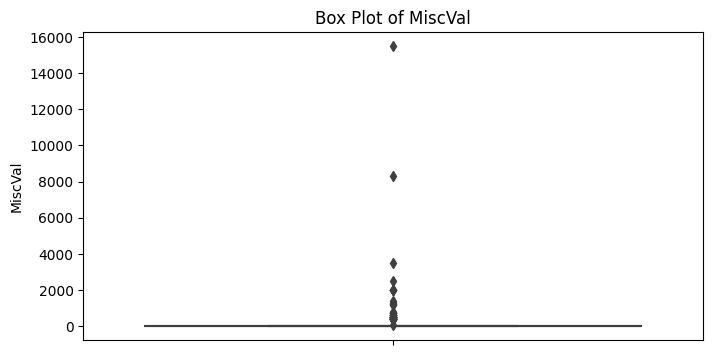

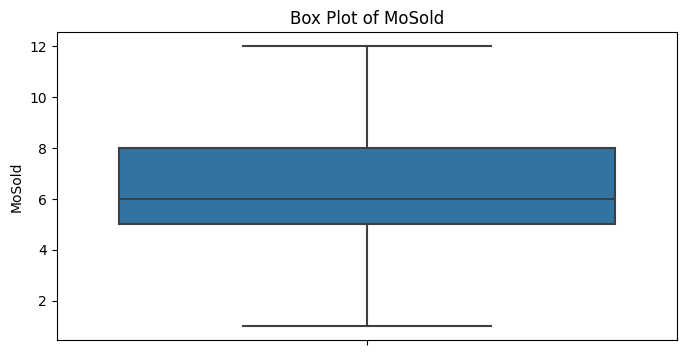

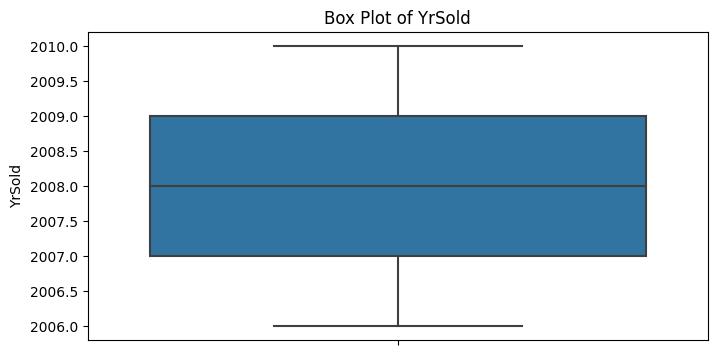

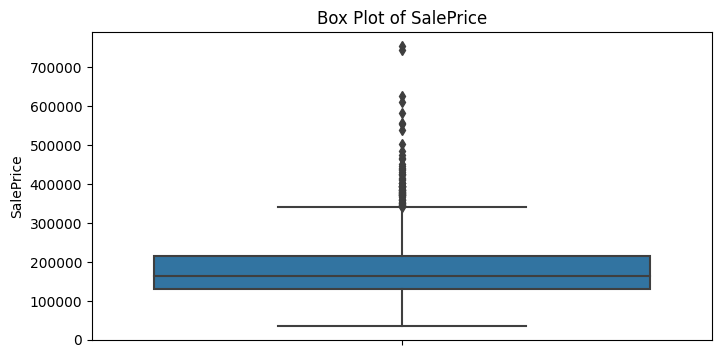

In [ ]:
# Box plots
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=house, y=col)
    plt.title(f'Box Plot of {col}')
    plt.show()



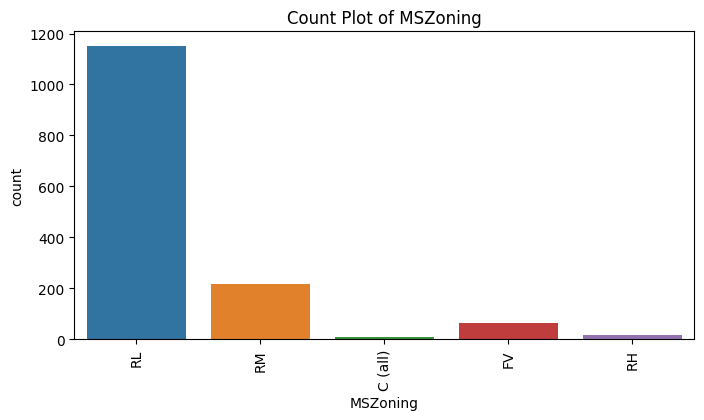

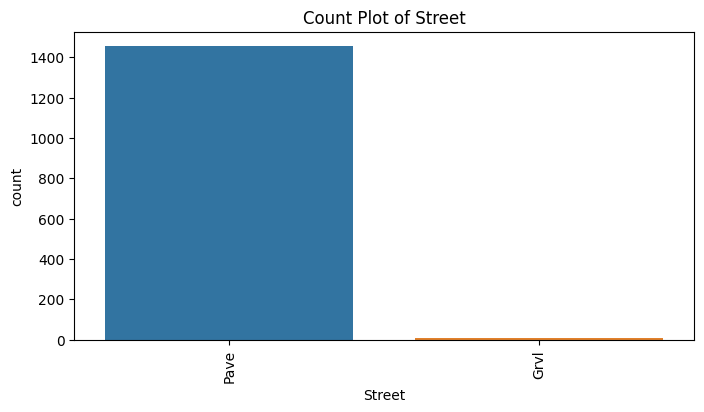

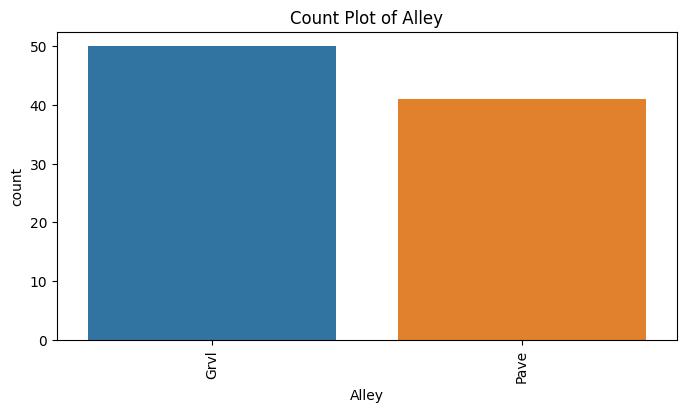

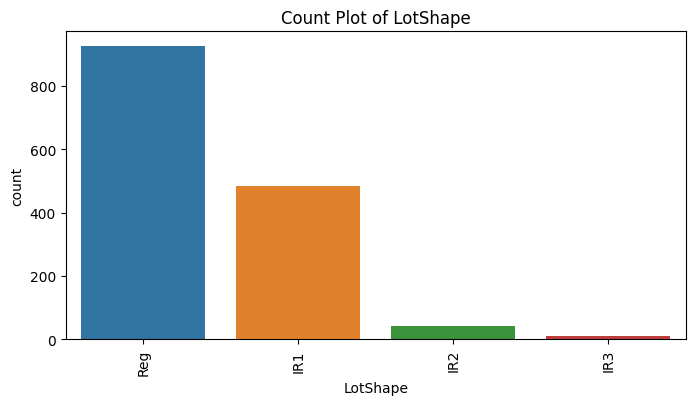

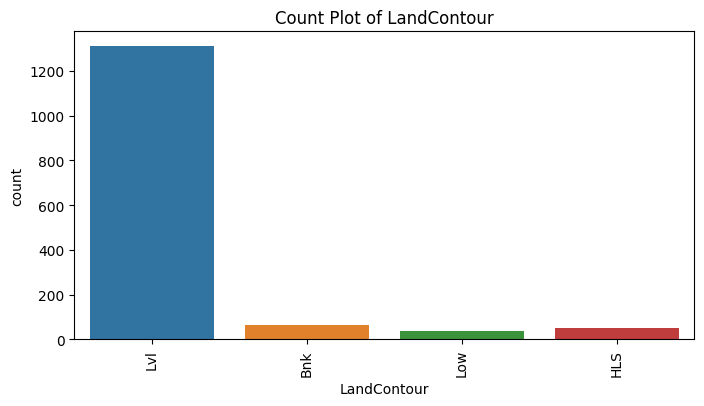

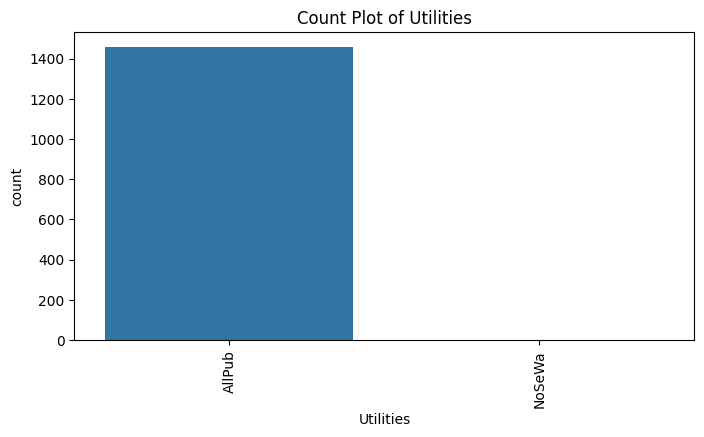

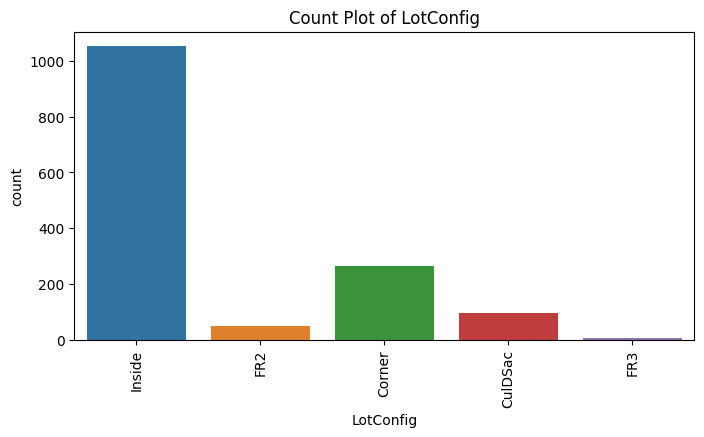

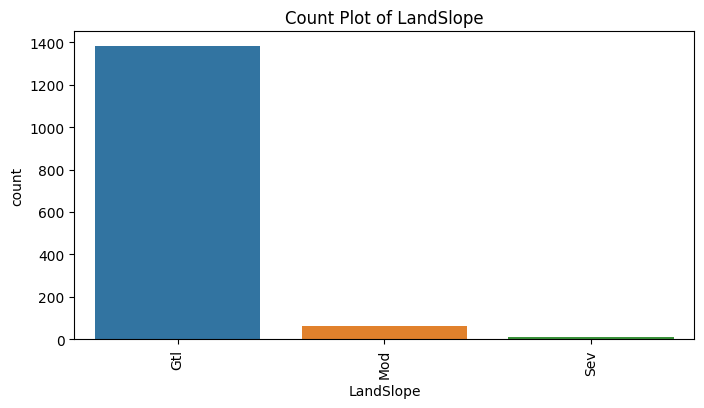

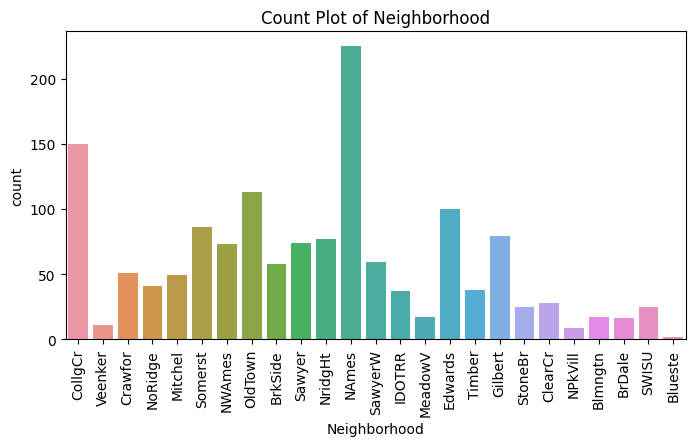

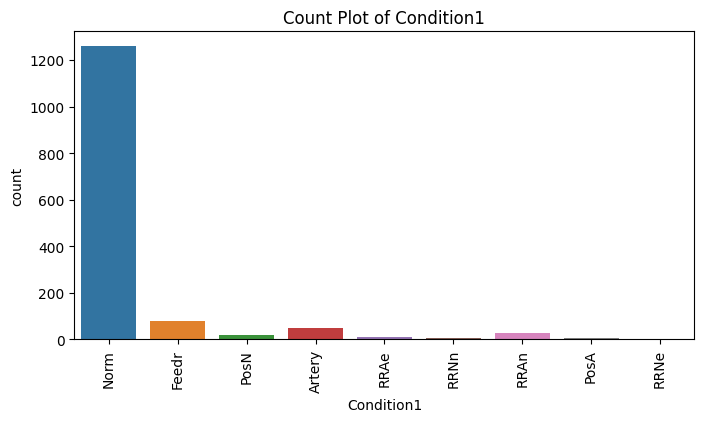

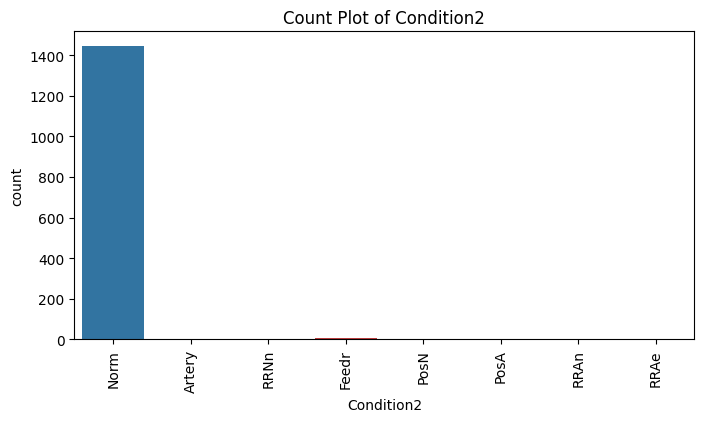

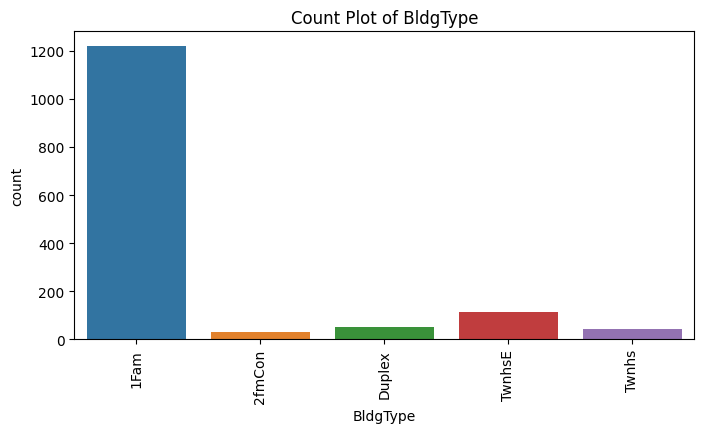

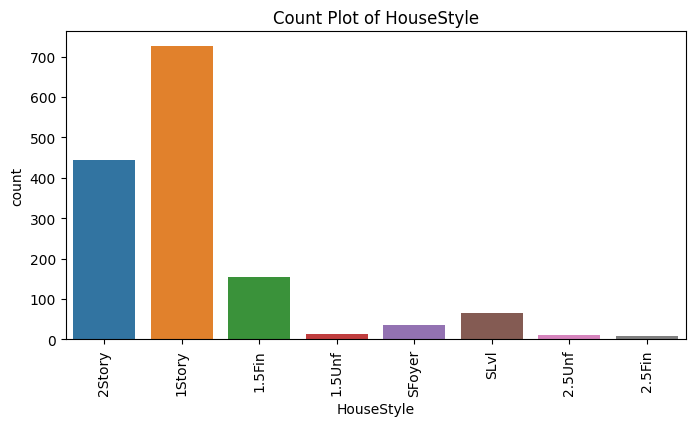

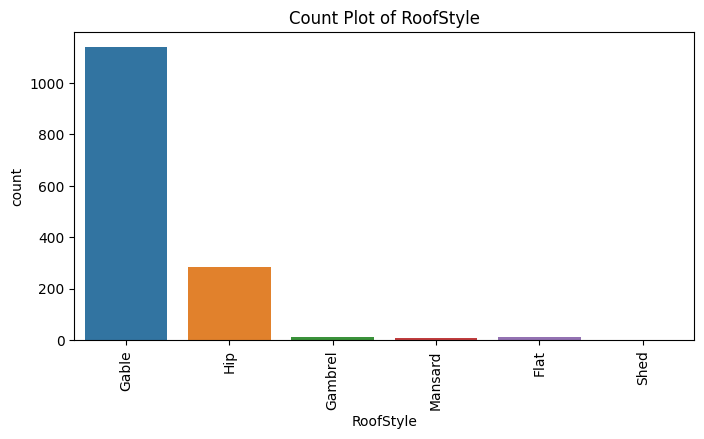

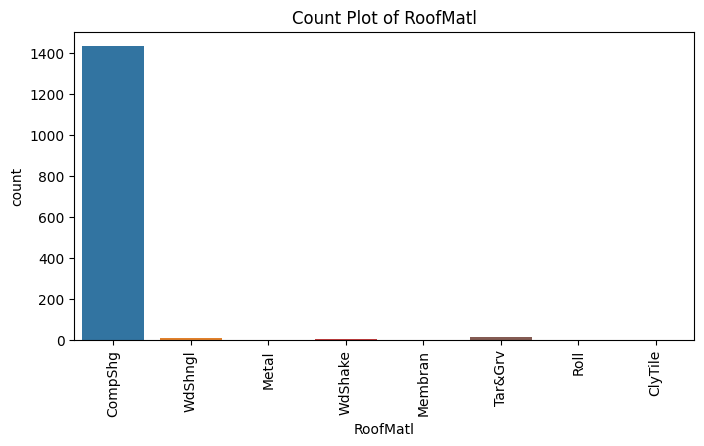

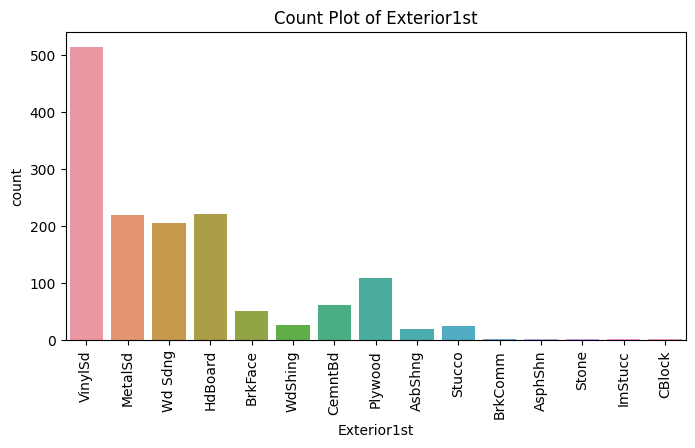

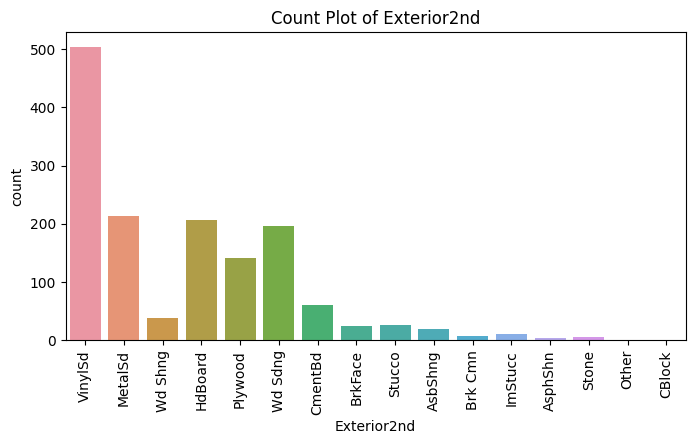

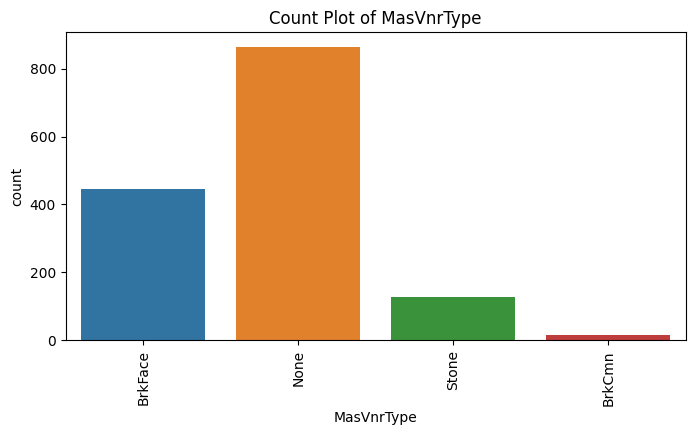

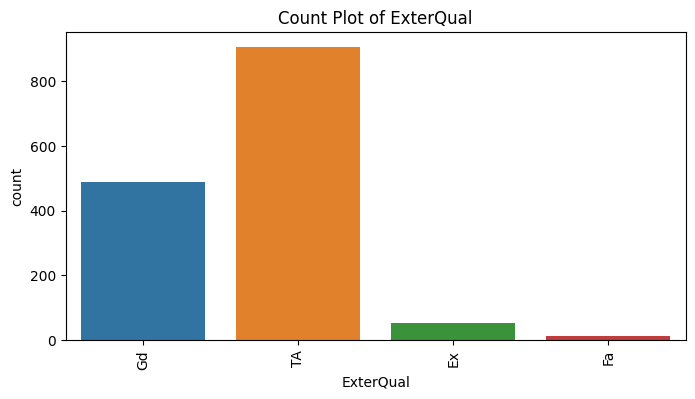

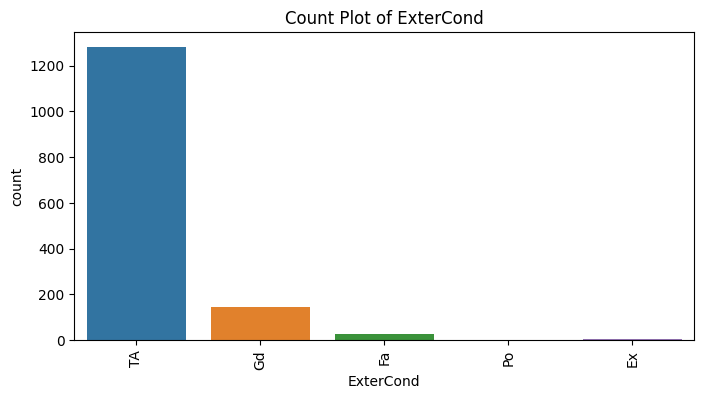

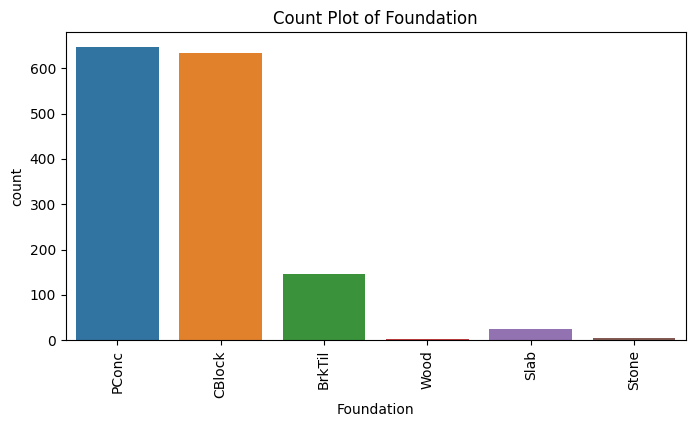

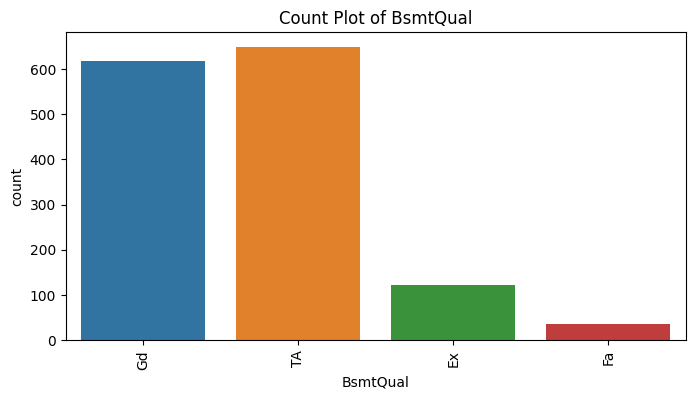

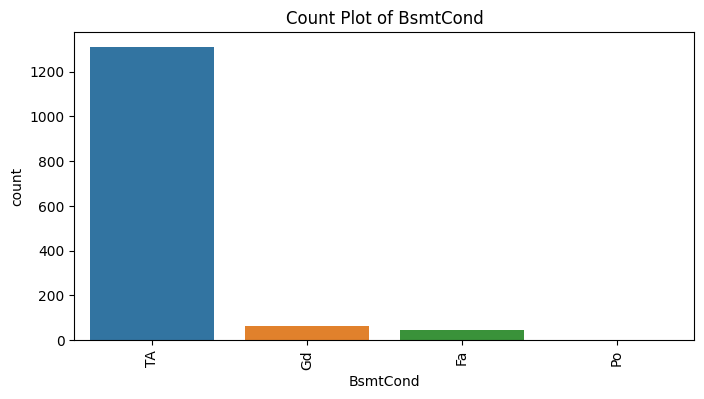

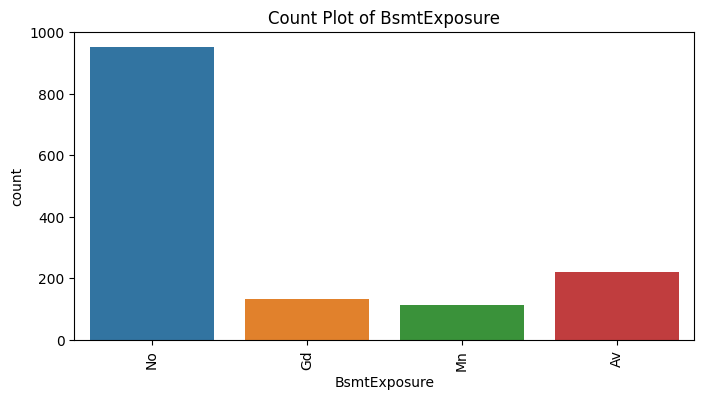

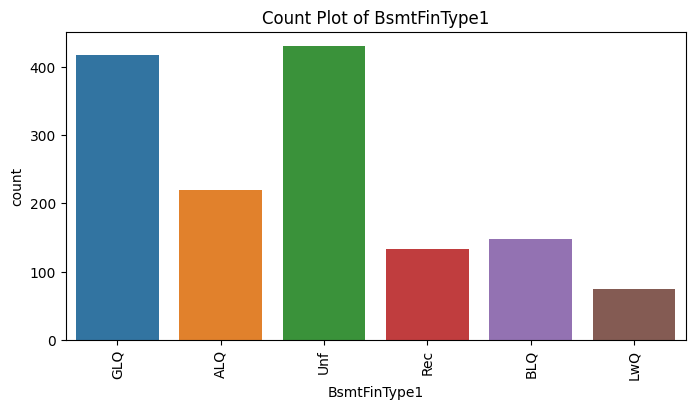

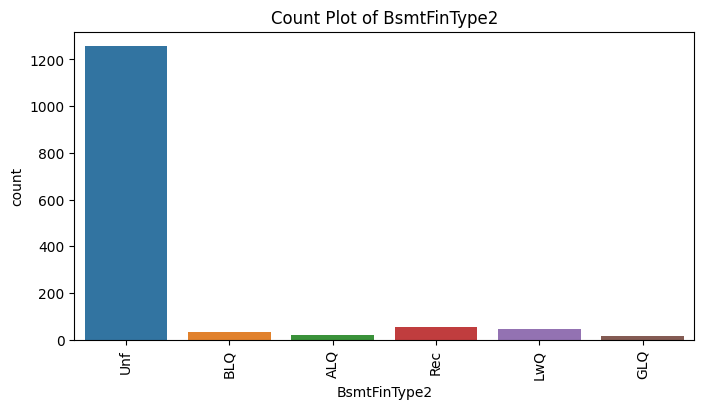

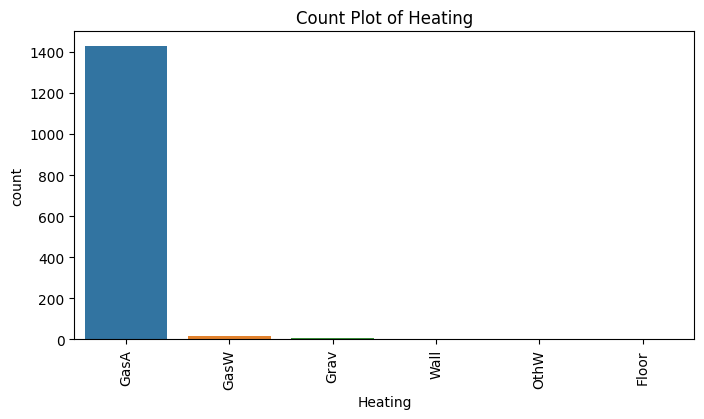

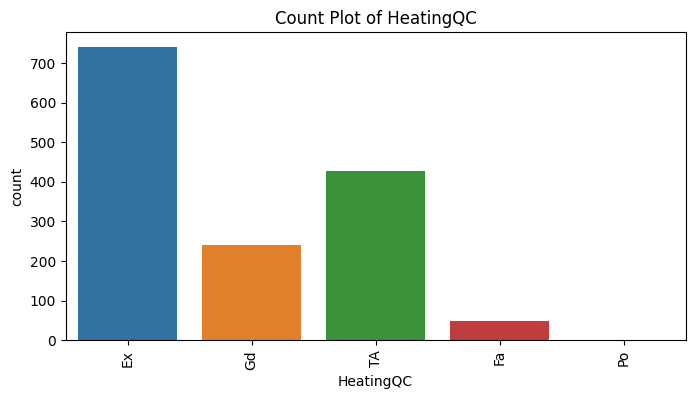

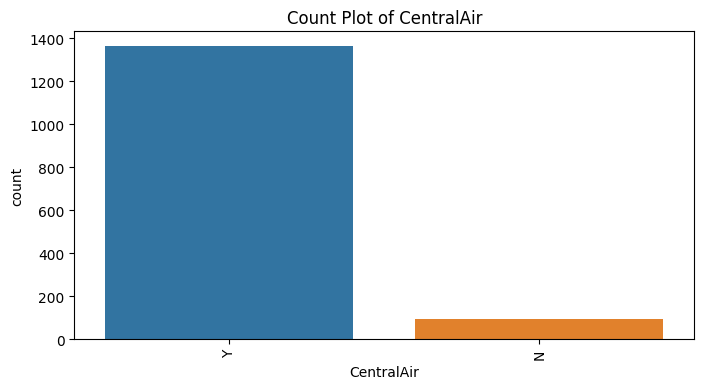

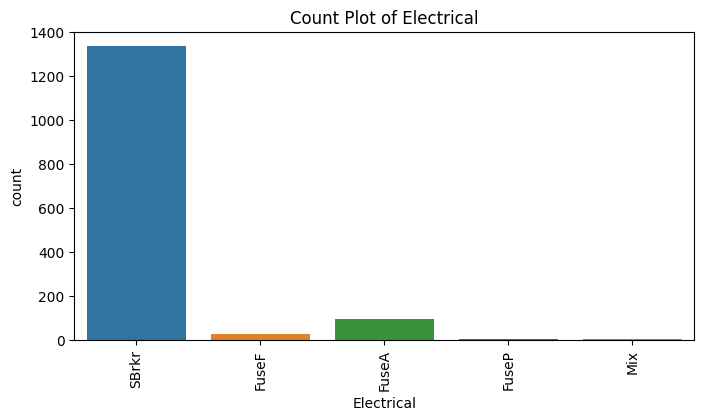

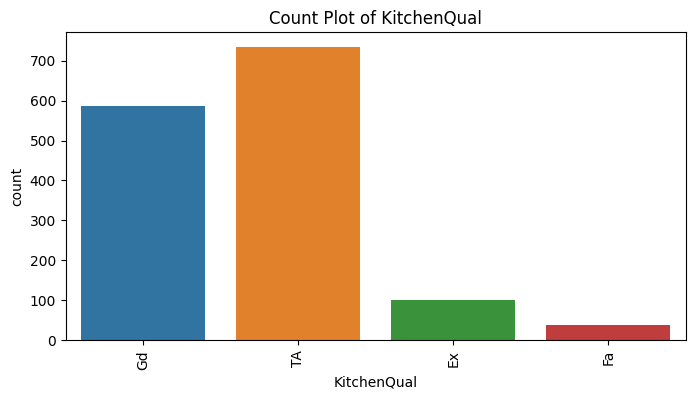

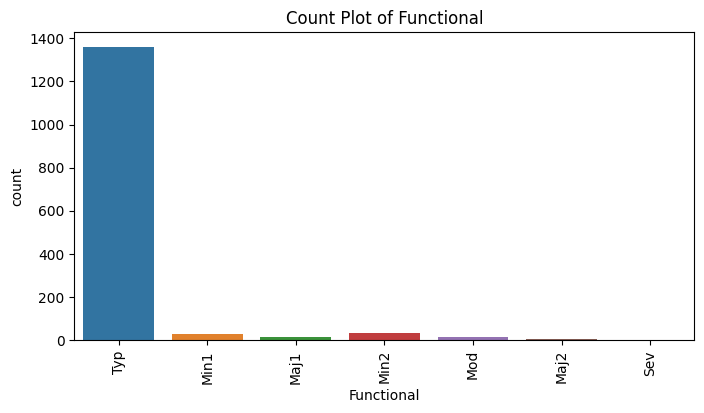

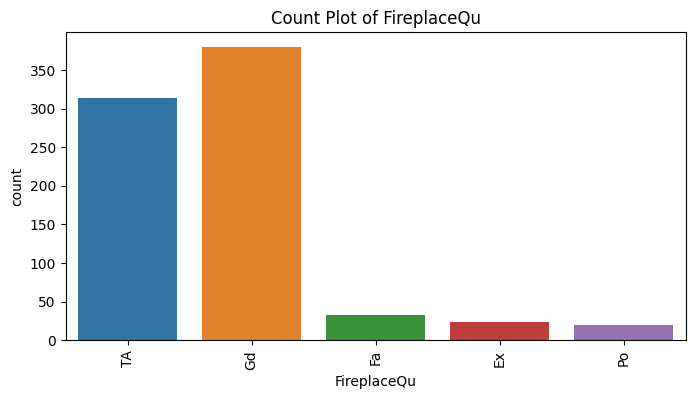

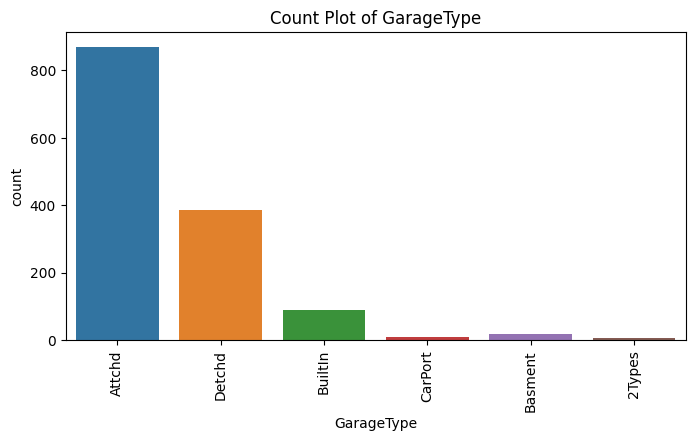

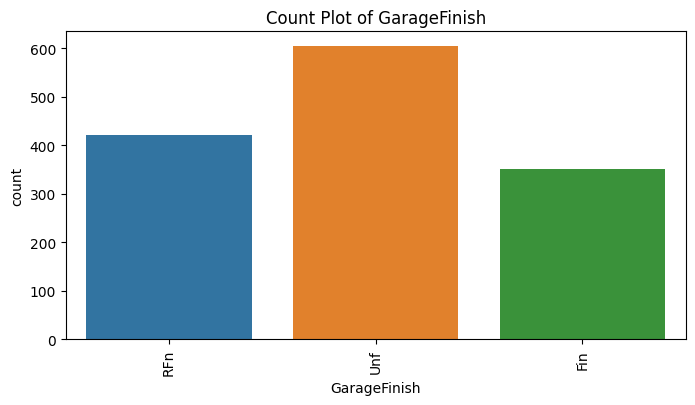

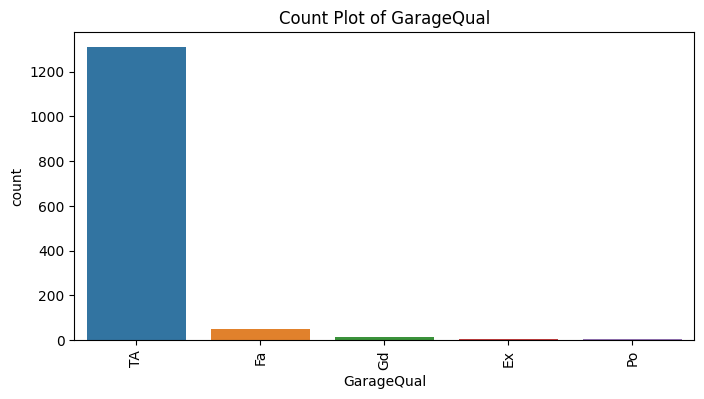

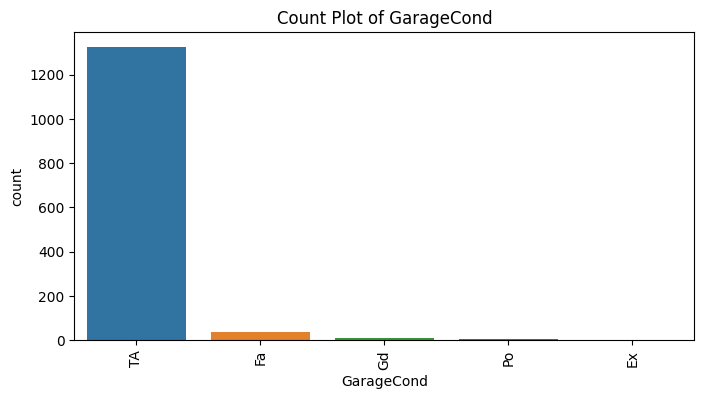

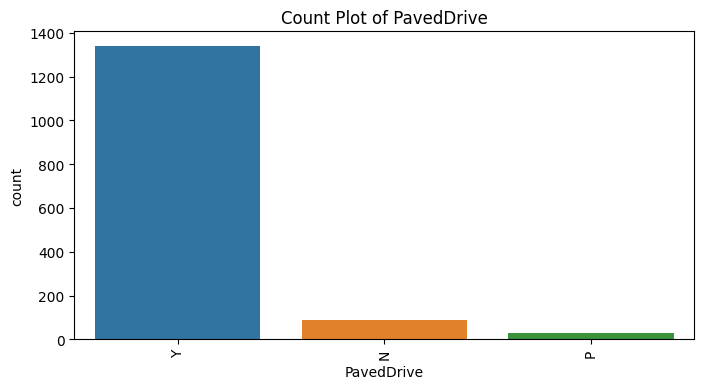

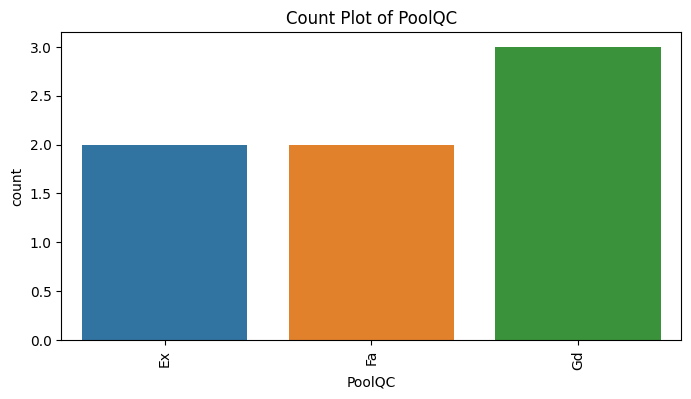

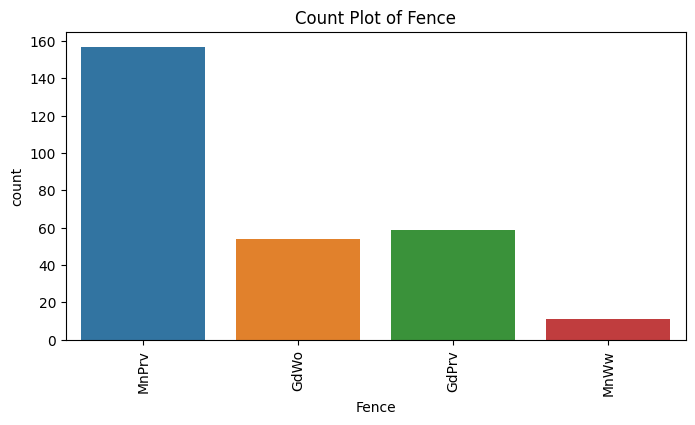

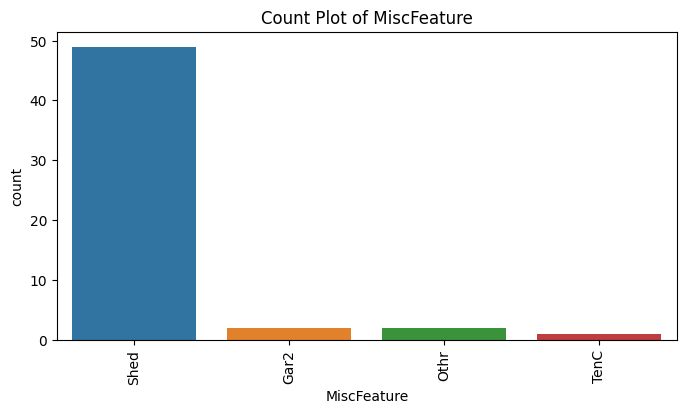

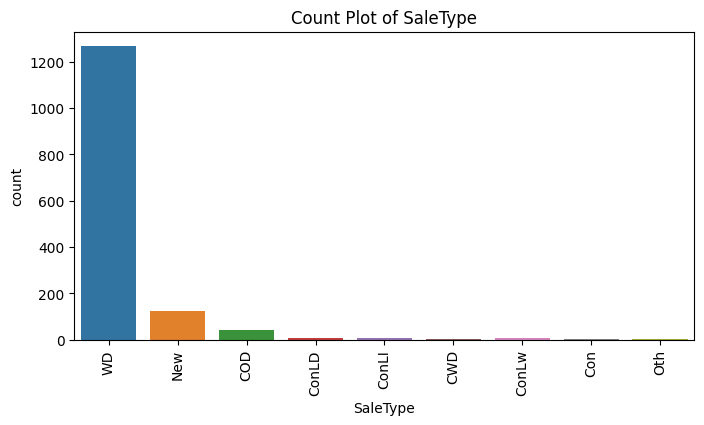

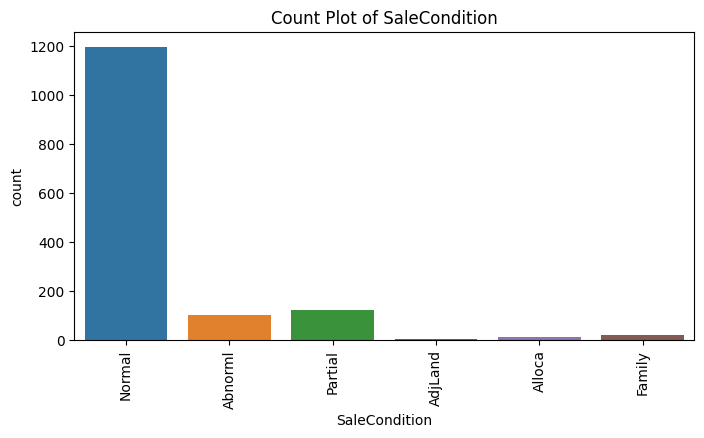

In [ ]:
# Count_plots
categorical_cols = house.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=house, x=col)
    plt.xticks(rotation=90)
    plt.title(f'Count Plot of {col}')
    plt.show()

In [ ]:
sns.pairplot(house, diag_kind='kde', hue='MSZoning')
plt.show()

In [ ]:
# Check data types for each column
print("Data Types for Each Column:")
print(house.dtypes)

# Check column names
expected_column_names = [
    'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
    'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
    'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
    'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
    'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
    'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
    'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
    'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
    'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence',
    'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'
]

if not all(col in house.columns for col in expected_column_names):
    print("Column names are not as expected. Check column names in the dataset.")

# Handling Null Values
numeric_columns = house.select_dtypes(include=['number']).columns
categorical_columns = house.select_dtypes(exclude=['number']).columns

# Replace null values in numeric columns with mean
house[numeric_columns] = house[numeric_columns].fillna(house[numeric_columns].mean())

# Replace null values in categorical columns with zero
house[categorical_columns] = house[categorical_columns].fillna(0)

# Save the cleaned dataset
house.to_csv('cleaned_house_data.csv', index=False)

In [ ]:
# Check data types for each column
print("Data Types for Each Column:")
print(house_test.dtypes)

# Check column names
expected_column_names = [
    'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
    'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
    'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
    'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
    'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
    'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
    'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
    'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
    'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence',
    'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'
]

if not all(col in house_test.columns for col in expected_column_names):
    print("Column names are not as expected. Check column names in the dataset.")

# Handling Null Values
numeric_columns = house_test.select_dtypes(include=['number']).columns
categorical_columns = house_test.select_dtypes(exclude=['number']).columns

# Replace null values in numeric columns with mean
house_test[numeric_columns] = house_test[numeric_columns].fillna(house_test[numeric_columns].mean())

# Replace null values in categorical columns with zero
house_test[categorical_columns] = house_test[categorical_columns].fillna(0)

# Save the cleaned dataset
house_test.to_csv('cleaned_house_test_data.csv', index=False)

In [ ]:
if not all(col in house.columns for col in expected_column_names):
    print("Column names are not as expected. Check column names in the dataset.")

# Print count of null values in each column
null_values = house.isnull().sum()
print("Null Values in Each Column:")
print(null_values)

In [ ]:
if not all(col in house_test.columns for col in expected_column_names):
    print("Column names are not as expected. Check column names in the dataset.")

# Print count of null values in each column
null_values = house_test.isnull().sum()
print("Null Values in Each Column:")
print(null_values)

In [ ]:
# Load the cleaned dataset
df = pd.read_csv('cleaned_house_data.csv')

# Remove the 'Id' column
df = df.drop(columns=['Id'])

# Feature Engineering Steps:

# 1. Combine the square footage features into one total area feature
df['TotalArea'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

# 2. Create a binary feature 'HasGarage' to indicate whether the house has a garage or not
df['HasGarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

# 3. Create a binary feature 'HasBsmt' to indicate whether the house has a basement or not
df['HasBsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

# 4. Create a binary feature 'HasFireplace' to indicate whether the house has a fireplace or not
df['HasFireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

# 5. Create a feature 'YearsSinceRemodel' indicating years since the last remodel
df['YearsSinceRemodel'] = df['YrSold'] - df['YearRemodAdd']

# 6. Drop columns that were used to create new features or are no longer needed
df = df.drop(columns=['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageArea', 'YearRemodAdd'])

# 7. One-Hot Encoding for categorical variables
df = pd.get_dummies(df, columns=['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape',
                                 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
                                 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
                                 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
                                 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                                 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
                                 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
                                 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
                                 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
                    drop_first=True)

# 8. Log transform the target variable 'SalePrice' to make it more normally distributed
df['SalePrice'] = df['SalePrice'].apply(lambda x: np.log1p(x))

# Now you have a feature-engineered dataset ready for machine learning

# Save the feature-engineered dataset
df.to_csv('feature_engineered_house_data.csv', index=False)

In [ ]:
# Load the cleaned dataset
df1 = pd.read_csv('cleaned_house_test_data.csv')

# Remove the 'Id' column
df1 = df1.drop(columns=['Id'])

# Feature Engineering Steps:

# 1. Combine the square footage features into one total area feature
df1['TotalArea'] = df1['TotalBsmtSF'] + df1['1stFlrSF'] + df1['2ndFlrSF']

# 2. Create a binary feature 'HasGarage' to indicate whether the house has a garage or not
df1['HasGarage'] = df1['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

# 3. Create a binary feature 'HasBsmt' to indicate whether the house has a basement or not
df1['HasBsmt'] = df1['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

# 4. Create a binary feature 'HasFireplace' to indicate whether the house has a fireplace or not
df1['HasFireplace'] = df1['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

# 5. Create a feature 'YearsSinceRemodel' indicating years since the last remodel
df1['YearsSinceRemodel'] = df1['YrSold'] - df1['YearRemodAdd']

# 6. Drop columns that were used to create new features or are no longer needed
df1 = df1.drop(columns=['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageArea', 'YearRemodAdd'])

# 7. One-Hot Encoding for categorical variables
df1 = pd.get_dummies(df1, columns=['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape',
                                 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
                                 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
                                 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
                                 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                                 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
                                 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
                                 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
                                 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
                    drop_first=True)

# 8. Log transform the target variable 'SalePrice' to make it more normally distributed
df1['SalePrice'] = df1['SalePrice'].apply(lambda x: np.log1p(x))

# Now you have a feature-engineered dataset ready for machine learning

# Save the feature-engineered dataset
df1.to_csv('feature_engineered_house_test_data.csv', index=False)



In [ ]:
# Load the feature-engineered dataset
df = pd.read_csv('feature_engineered_house_data.csv')

# Remove rows with unique 'SalePrice' values
df = df[df.groupby('SalePrice')['SalePrice'].transform('count') > 1]

# Define your features (X) and target (y)
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

# Split the data into training and testing sets with stratification based on 'SalePrice'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=df['SalePrice'])

# Check the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

In [ ]:
# Load the feature-engineered dataset
df = pd.read_csv('feature_engineered_house_data.csv')

# Define your features (X) and target (y)
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

# Split the data into training and testing sets with stratification based on 'SalePrice'
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = model.predict(X_test)

# Create a DataFrame to display predicted and actual values
results_df = pd.DataFrame({'Actual SalePrice': y_test, 'Predicted SalePrice': y_pred})

# Print the results
print(results_df)

In [ ]:
# Load the feature-engineered dataset
df = pd.read_csv('feature_engineered_house_data.csv')

# Define your features (X) and target (y)
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

# Split the data into training and testing sets with stratification based on 'SalePrice'
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = model.predict(X_test)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = sqrt(mean_squared_error(y_test, y_pred))

# Print the results
print("R-squared (R²):", r2)
print("Root Mean Squared Error (RMSE):", rmse)

In [ ]:
# Load the feature-engineered dataset
df = pd.read_csv('feature_engineered_house_data.csv')

# Define your features (X) and target (y)
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

# Split the data into training and testing sets with stratification based on 'SalePrice'
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = model.predict(X_test)

# Create a DataFrame to display predicted and actual values
results_df = pd.DataFrame({'Actual SalePrice': y_test, 'Predicted SalePrice': y_pred})

# Print the results
print("Results for the original test dataset:")
print(results_df)


K-MEANS

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('/content/EWA.csv')
X = dataset.iloc[:, [10, 11]].values
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Airlines')
plt.xlabel('Days Since Enrolled')
plt.ylabel('Award')
plt.legend()
plt.show()